In [69]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import scipy.ndimage
from keras import backend as K

In [70]:
# Configuration options
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape)
print(Y_train.shape)

feature_vector_length = X_train.shape[1]*X_train.shape[2]
print(feature_vector_length)

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
print(X_train.shape)
print(X_test.shape)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 - 0.5
X_test /= 255 - 0.5

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
mnist_model = Sequential()
mnist_model.add(Dense(392, input_shape=input_shape, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(196, activation='relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist_history = mnist_model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_data=(X_test, Y_test))

# Test the model after training
test_results = mnist_model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

(60000, 28, 28)
(60000,)
784
(60000, 784)
(10000, 784)
Feature shape: (784,)
Epoch 1/10
240/240 [==============================] - 4s 16ms/step - loss: 0.4130 - accuracy: 0.8761 - val_loss: 0.1541 - val_accuracy: 0.9526
Epoch 2/10
240/240 [==============================] - 4s 15ms/step - loss: 0.1644 - accuracy: 0.9515 - val_loss: 0.1017 - val_accuracy: 0.9675
Epoch 3/10
240/240 [==============================] - 4s 15ms/step - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.0854 - val_accuracy: 0.9742
Epoch 4/10
240/240 [==============================] - 4s 15ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0736 - val_accuracy: 0.9756
Epoch 5/10
240/240 [==============================] - 4s 15ms/step - loss: 0.0747 - accuracy: 0.9772 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 6/10
240/240 [==============================] - 4s 15ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 7/10
240/240 [==============================] - 4s 15ms/ste

In [197]:
mnist_model.predict(np.array([X_train[0]])).shape

(1, 10)

In [141]:
for i in mnist_model.predict(np.array([X_train[0]])):
  print(np.argmax(i))

5


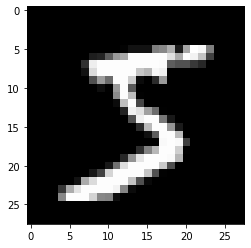

In [140]:
image = X_train[0].reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


In [15]:
mnist_model.layers[0:5]

In [200]:
for layer in mnist_model.layers:
  print(layer.trainable)

True
True
True
True
True


In [201]:
for layer in mnist_model.layers:
  layer.trainable = False

In [202]:
for layer in mnist_model.layers:
  print(layer.trainable)

False
False
False
False
False


In [203]:
mnist_model.add(Dense(10, activation='relu'))
mnist_model.add(Dense(2, activation='linear'))

In [204]:
RMSprop = optimizers.RMSprop(lr=0.01)
mnist_model.compile(loss='mse', optimizer=RMSprop)

In [205]:
for layer in mnist_model.layers:
  print(layer.trainable)

False
False
False
False
False
True
True


In [207]:
mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_6 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_7 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1970      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [313]:
mnist_model.predict(np.array([X_train[0]]))

array([[0.08957502, 0.27612558]], dtype=float32)

In [210]:
# with a Sequential model
get_4th_layer_output = K.function([mnist_model.layers[0].input],
                                  [mnist_model.layers[4].output])


In [212]:
layer_output = get_4th_layer_output(X_train[0].reshape(1,784))[0]

In [213]:
layer_output.argmax()

5

In [214]:
indices = [layer_output.argmax()]
depth = 10
tensorflow.one_hot(indices, depth).numpy().shape

(1, 10)

In [223]:
tensorflow.one_hot(indices, depth).numpy()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [225]:
to_categorical(layer_output.argmax(), num_classes=10).shape

(10,)

In [222]:
def tau(s,a):
    if (s[0] and s[9]) == 0 : s=np.roll(s,a)
    return s

def rho(s):
    return ((s[0]==1)+2*(s[9]==1))    

def terminal_state(s):
    return (s[0]==1 or s[9]==1)    

gamma=0.8
invT = 1

In [298]:
np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).shape

(10,)

In [339]:
state

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
next_s

In [332]:
tau(state.reshape(10,),a)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

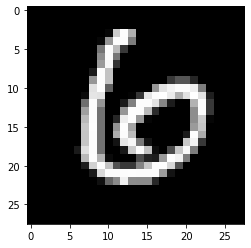

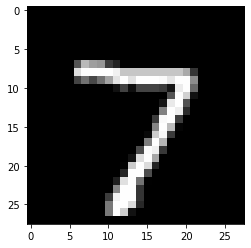

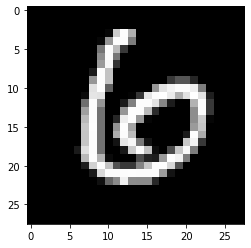

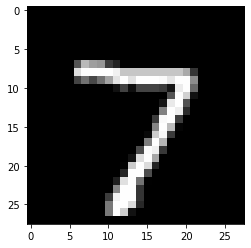

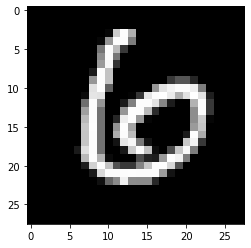

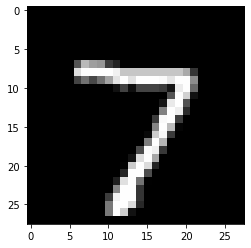

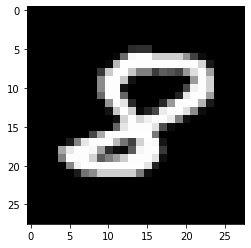

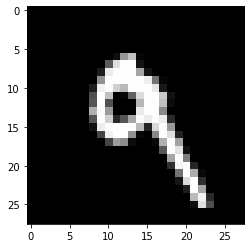

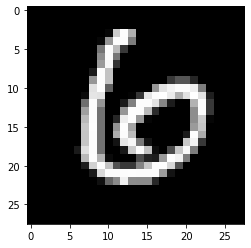

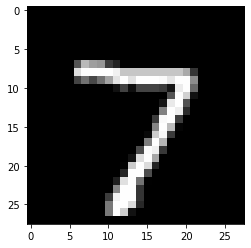

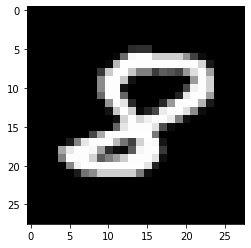

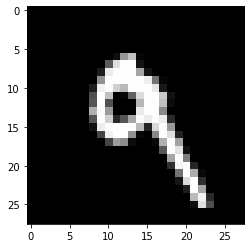

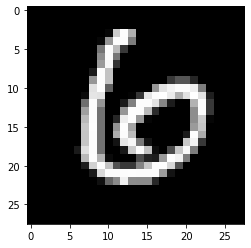

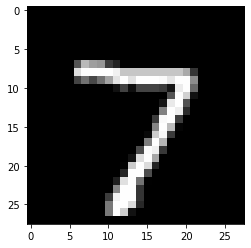

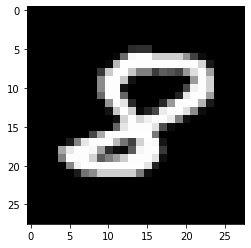

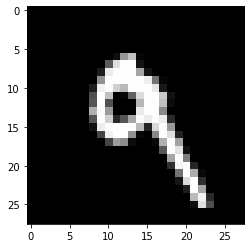

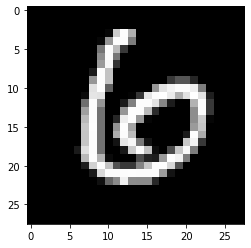

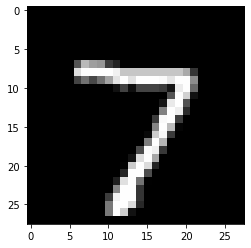

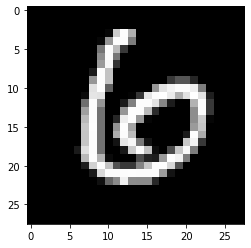

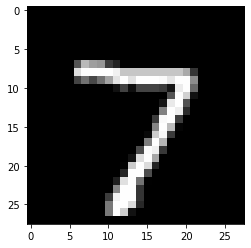

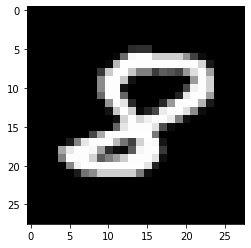

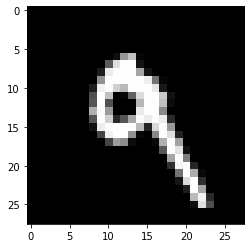

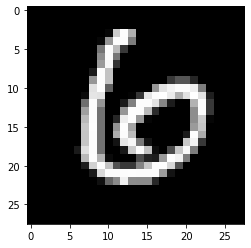

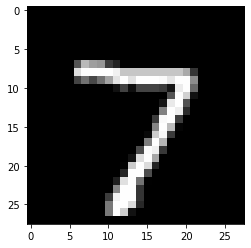

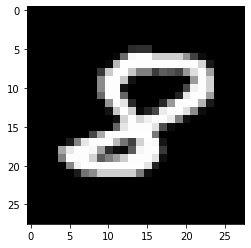

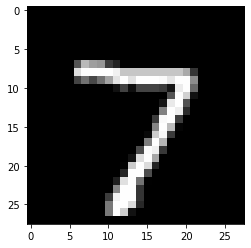

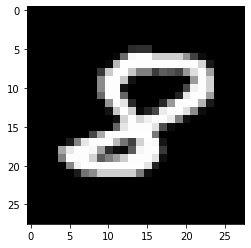

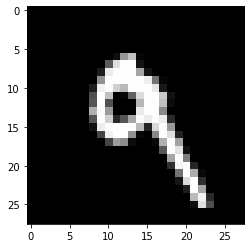

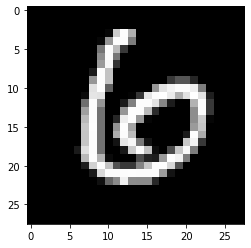

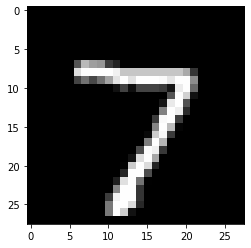

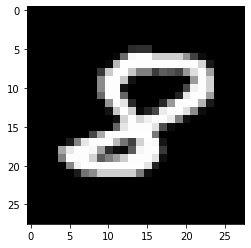

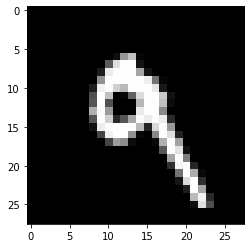

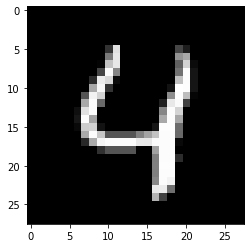

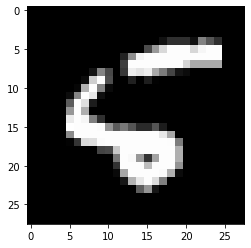

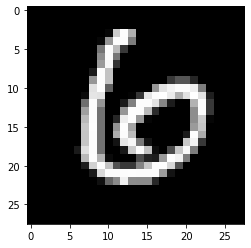

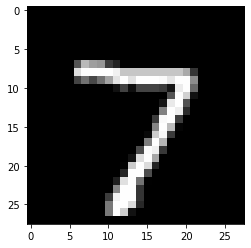

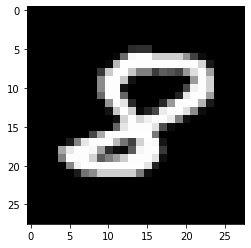

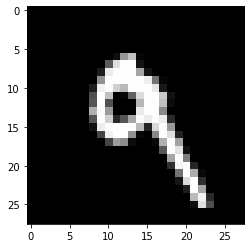

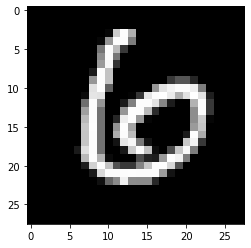

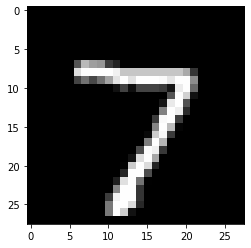

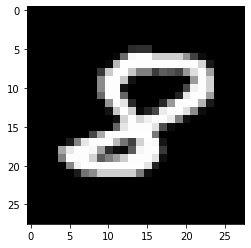

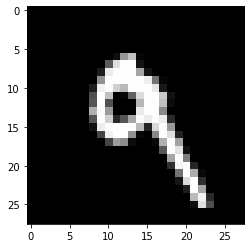

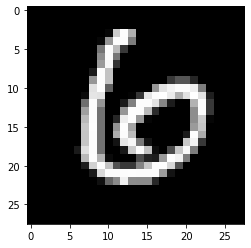

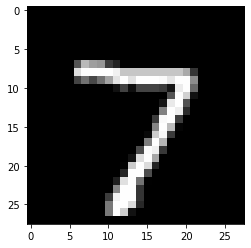

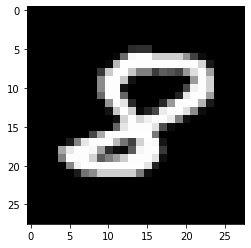

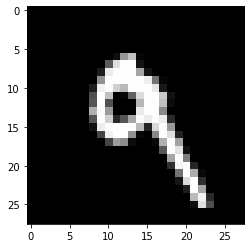

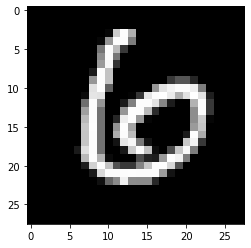

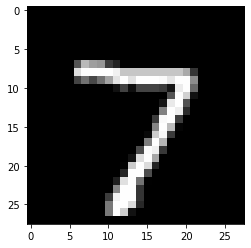

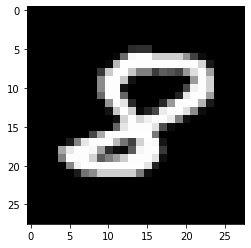

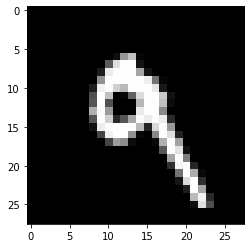

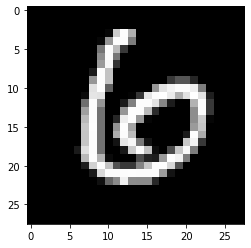

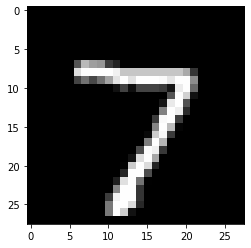

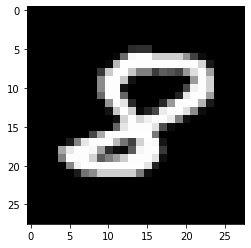

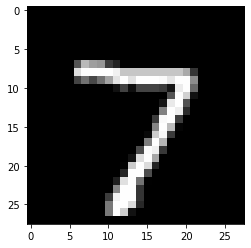

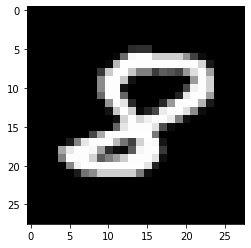

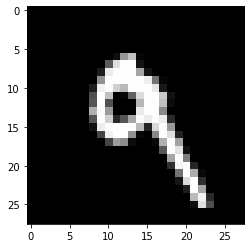

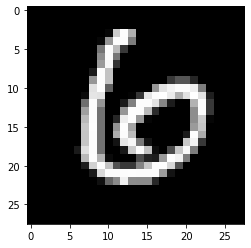

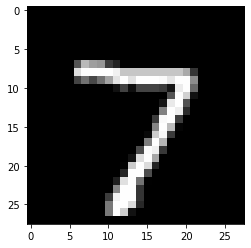

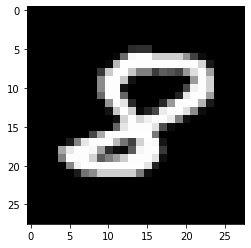

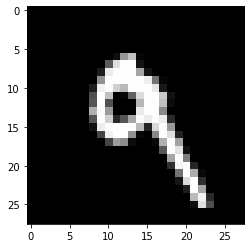

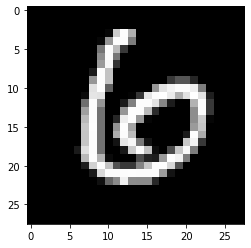

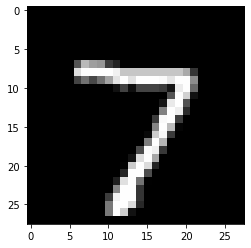

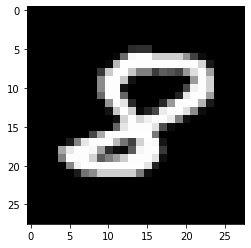

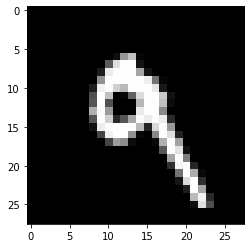

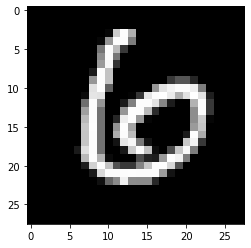

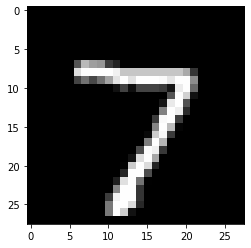

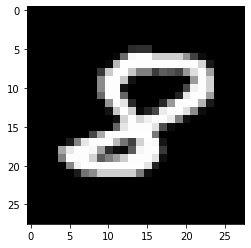

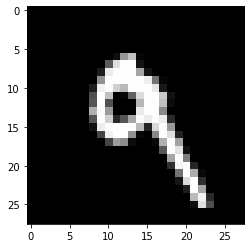

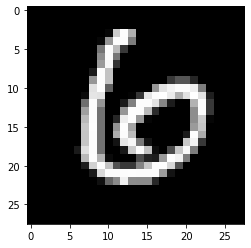

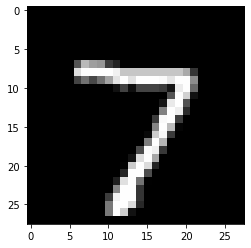

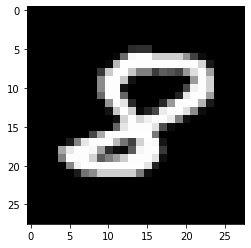

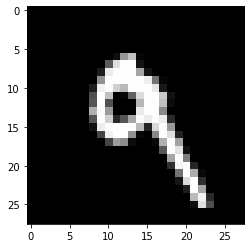

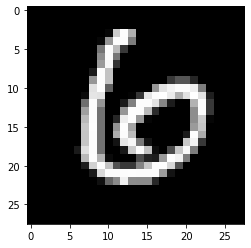

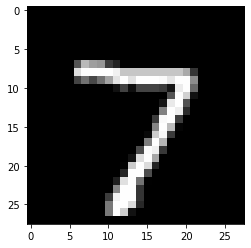

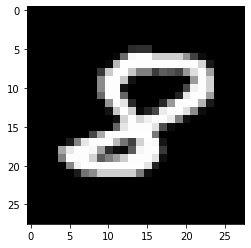

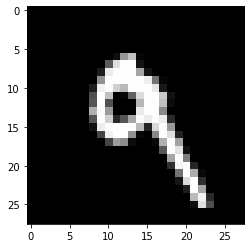

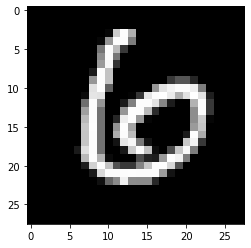

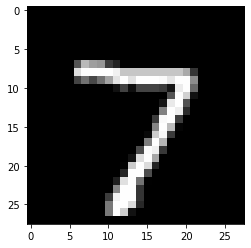

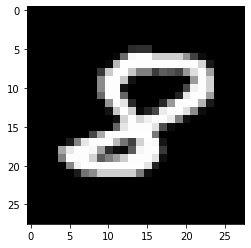

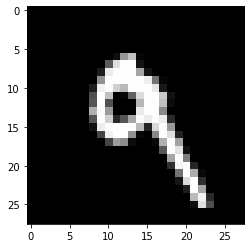

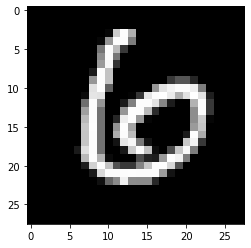

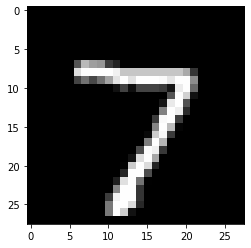

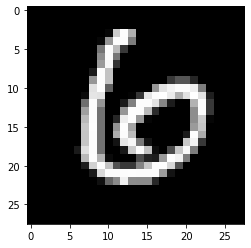

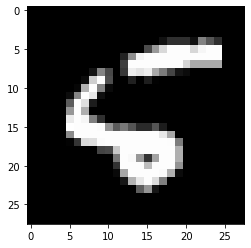

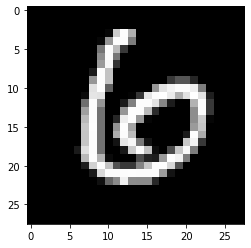

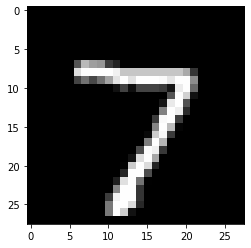

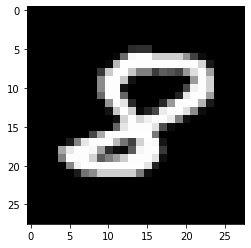

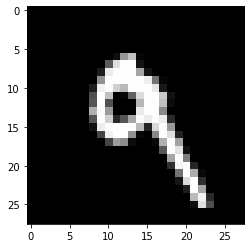

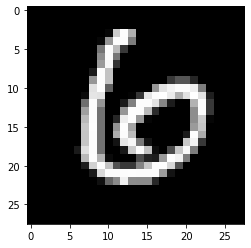

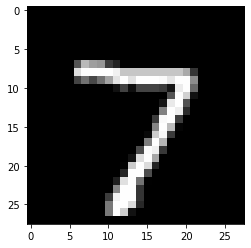

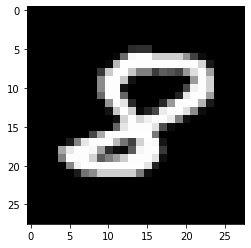

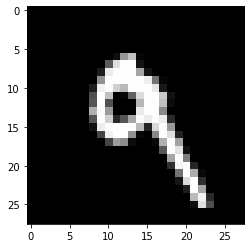

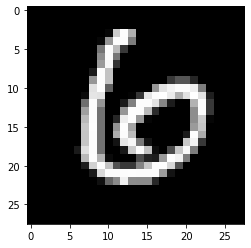

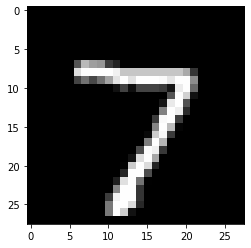

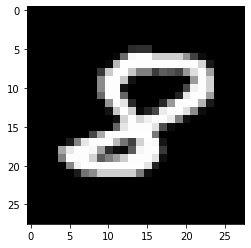

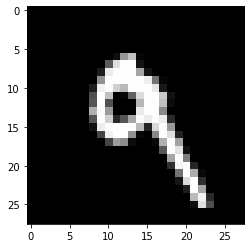

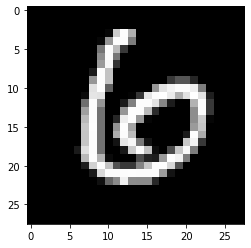

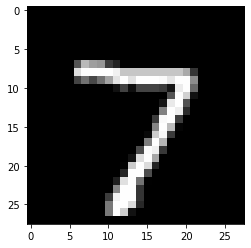

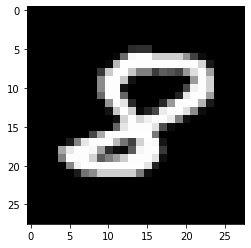

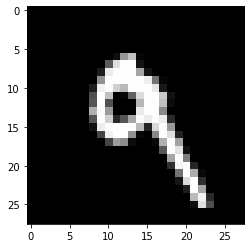

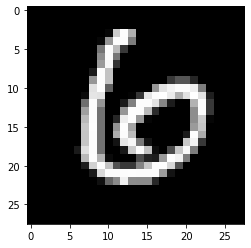

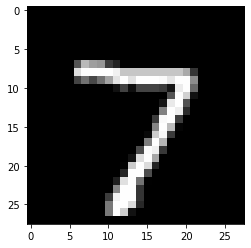

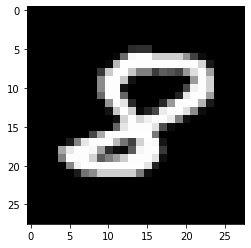

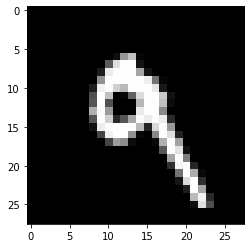

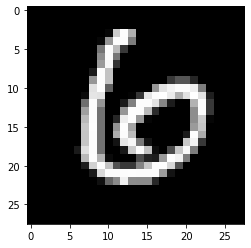

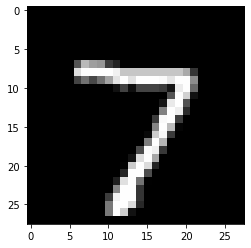

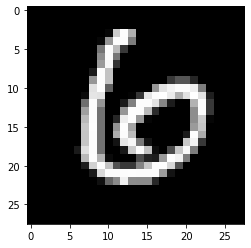

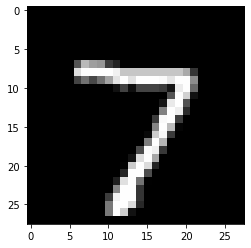

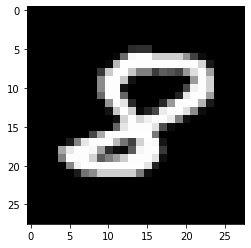

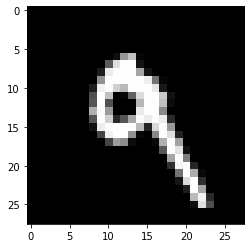

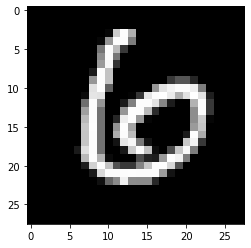

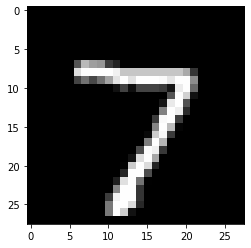

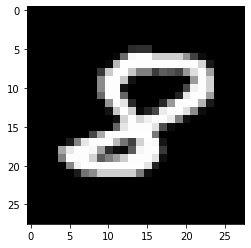

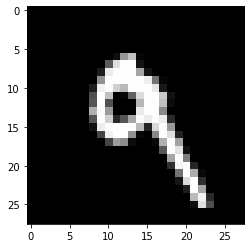

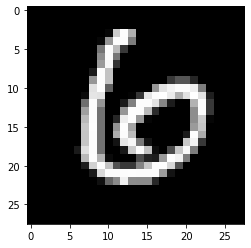

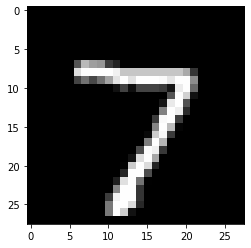

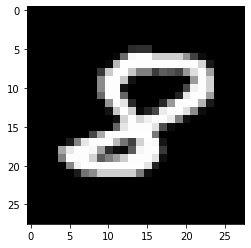

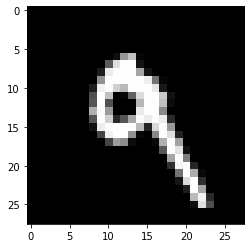

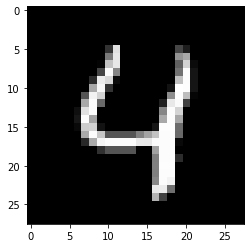

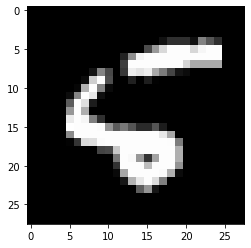

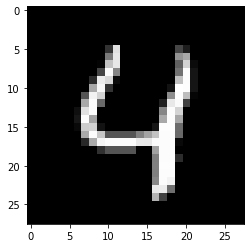

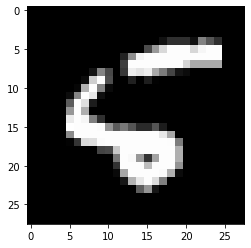

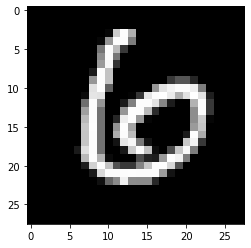

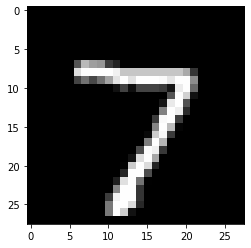

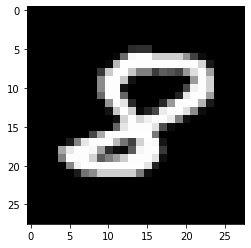

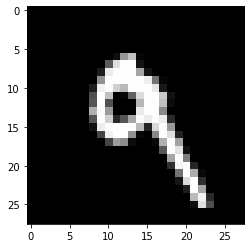

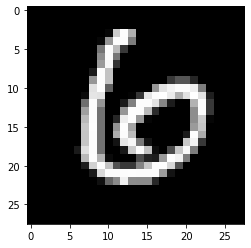

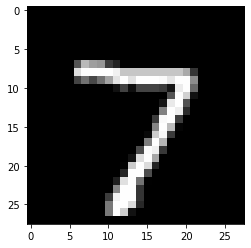

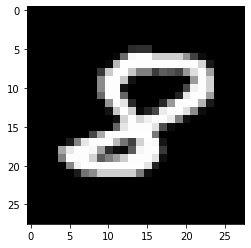

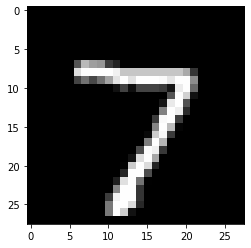

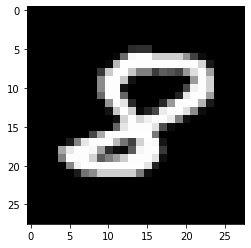

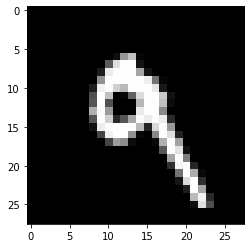

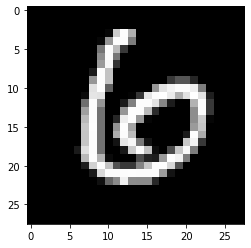

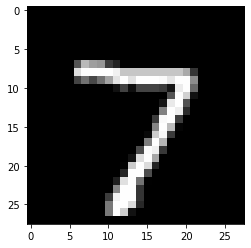

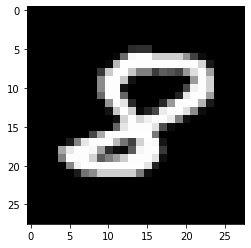

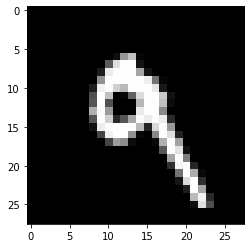

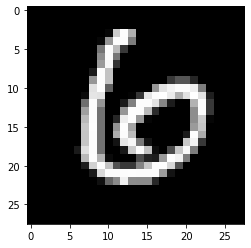

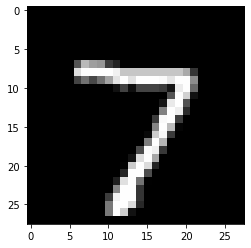

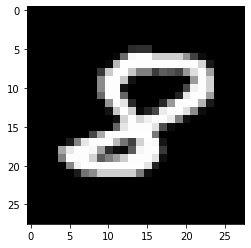

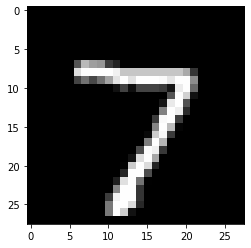

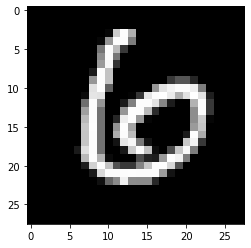

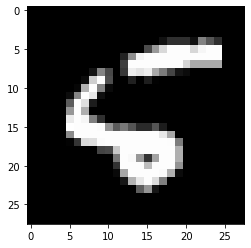

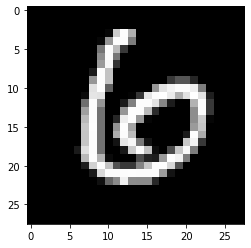

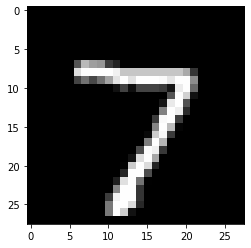

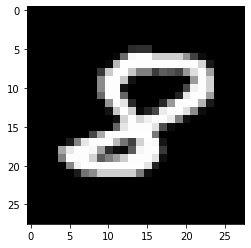

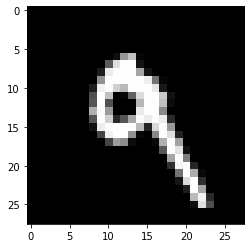

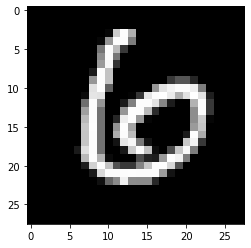

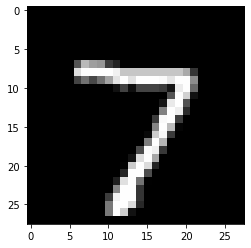

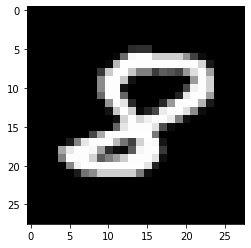

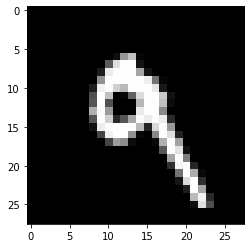

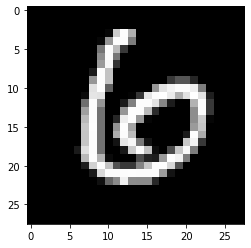

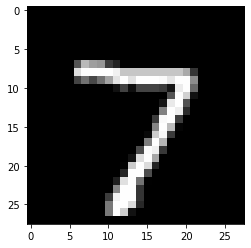

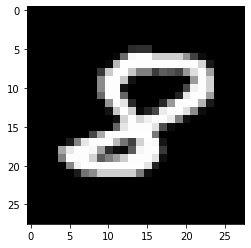

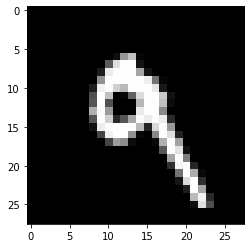

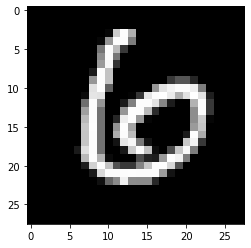

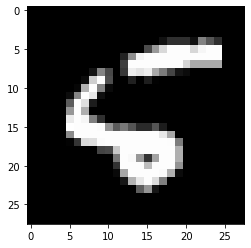

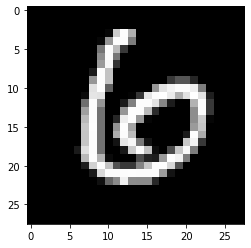

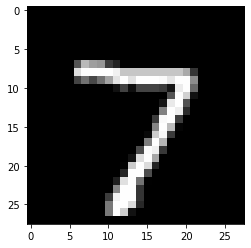

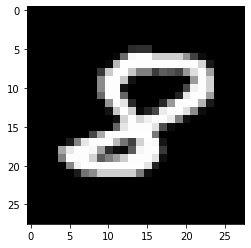

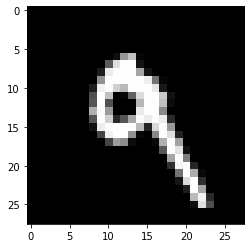

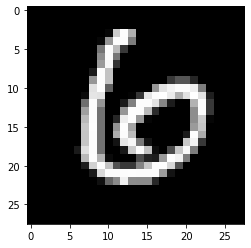

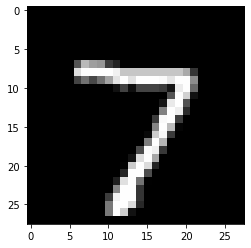

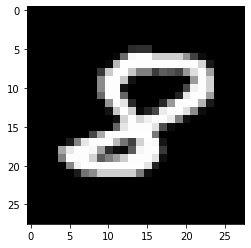

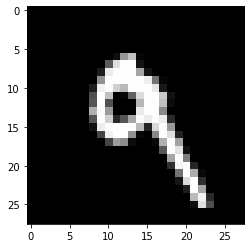

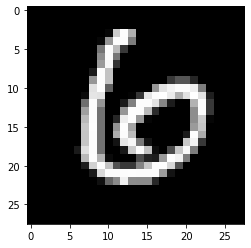

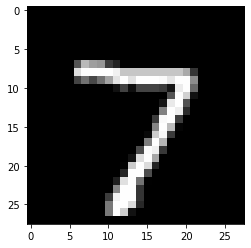

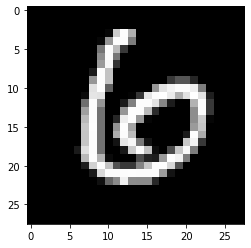

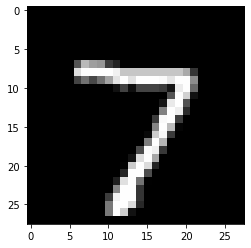

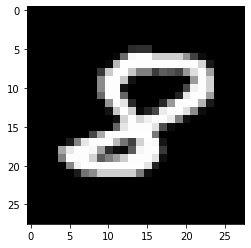

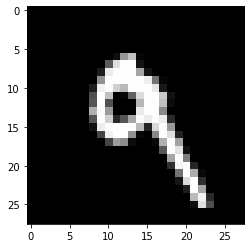

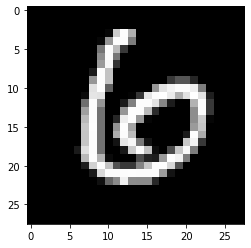

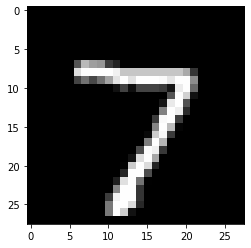

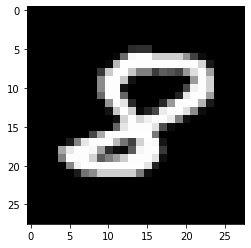

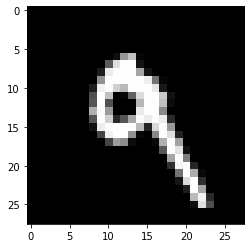

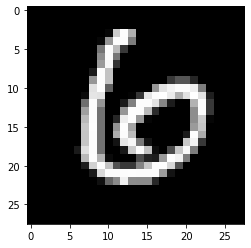

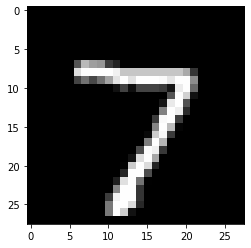

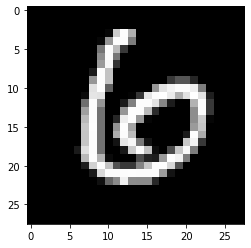

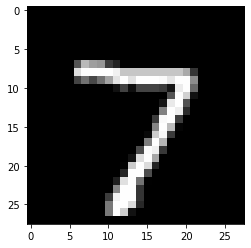

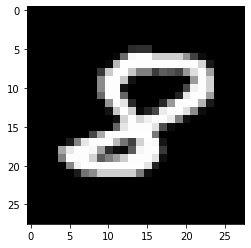

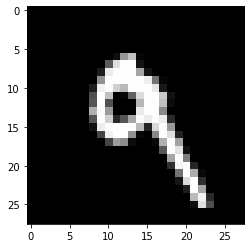

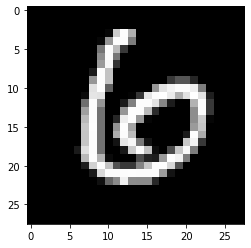

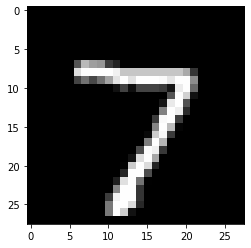

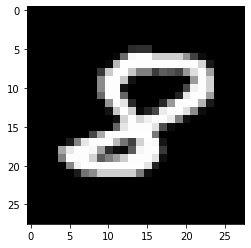

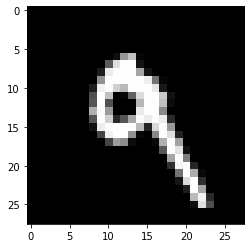

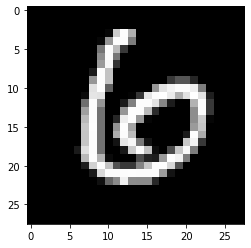

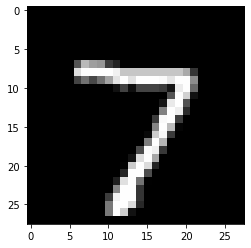

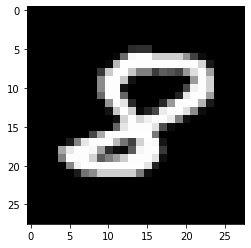

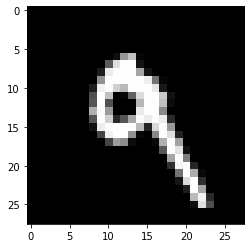

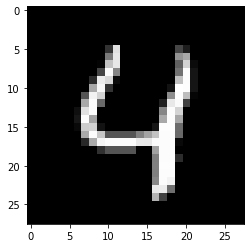

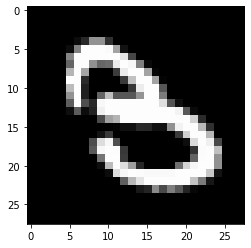

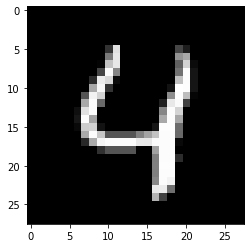

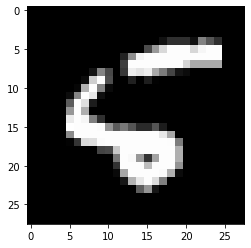

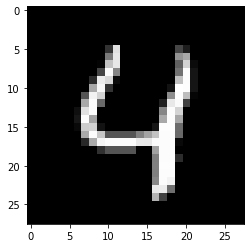

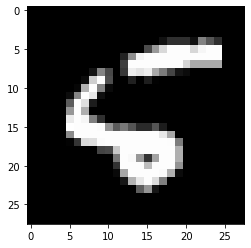

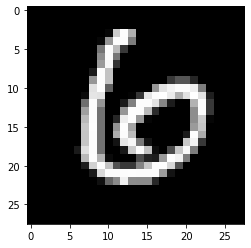

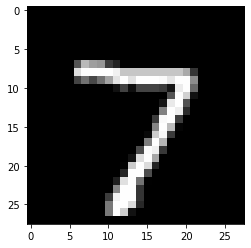

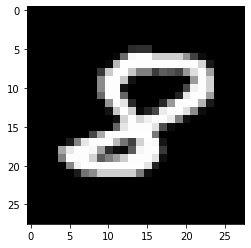

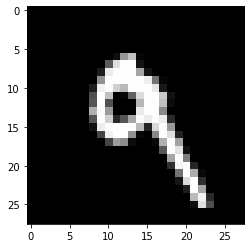

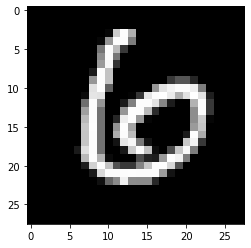

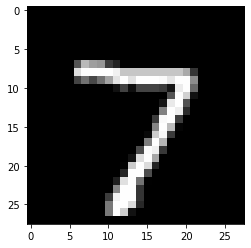

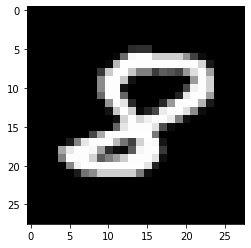

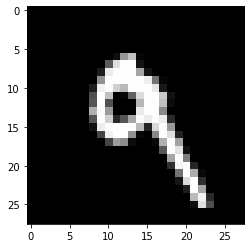

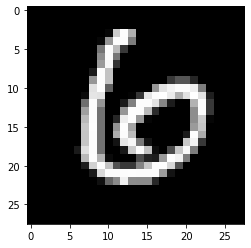

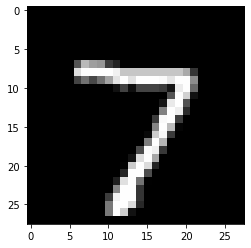

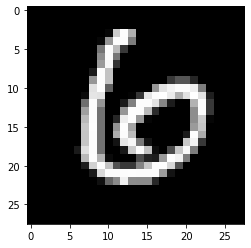

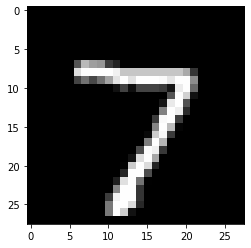

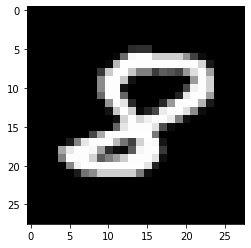

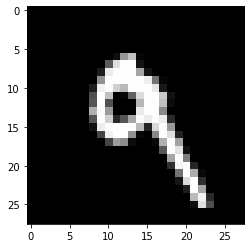

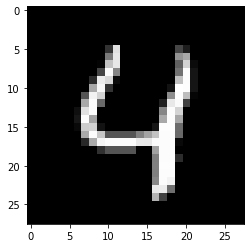

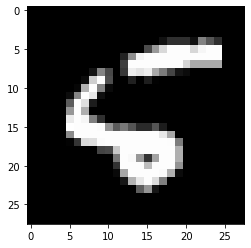

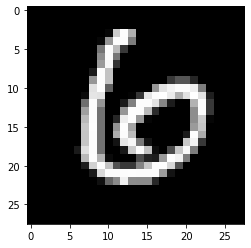

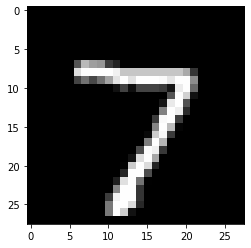

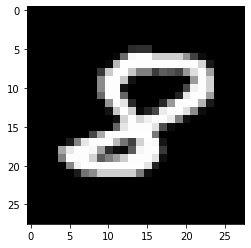

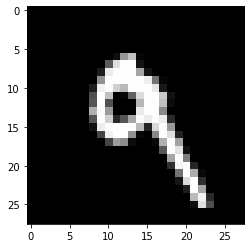

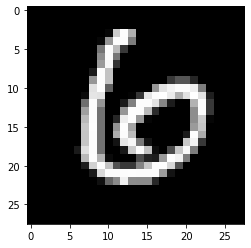

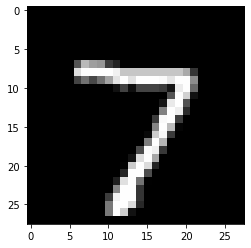

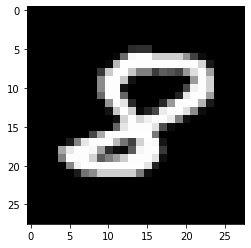

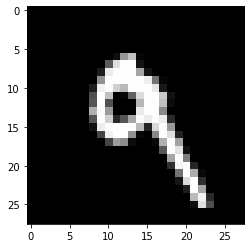

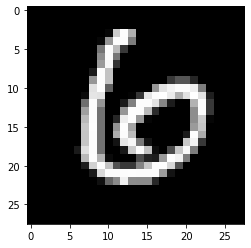

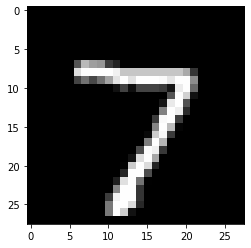

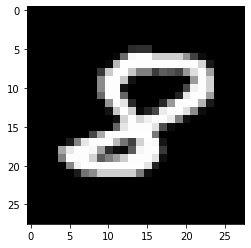

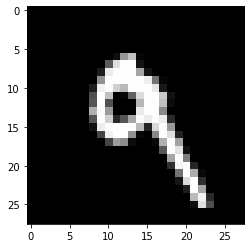

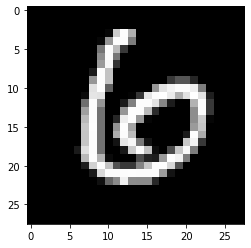

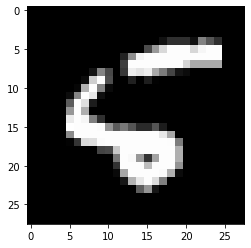

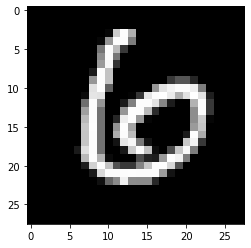

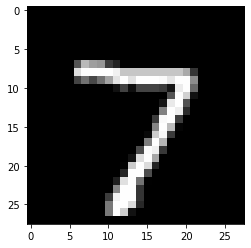

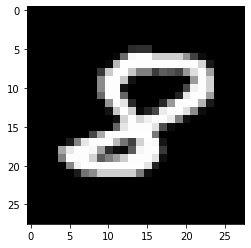

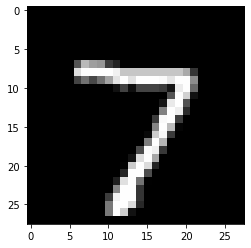

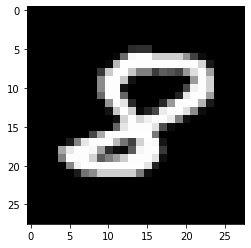

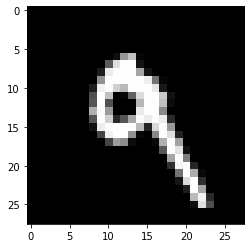

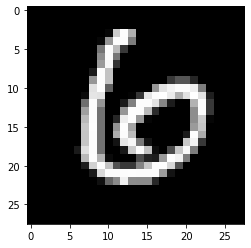

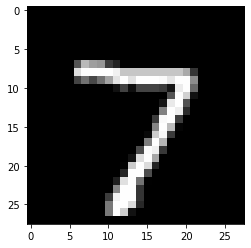

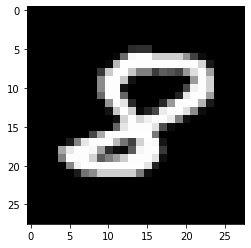

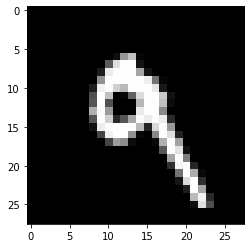

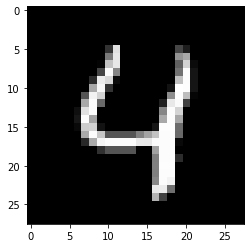

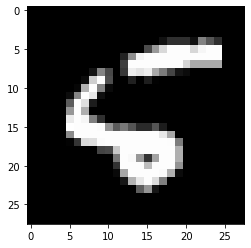

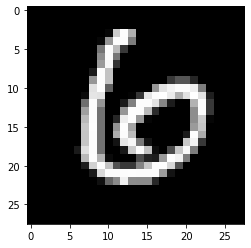

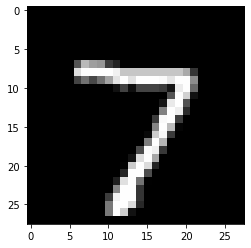

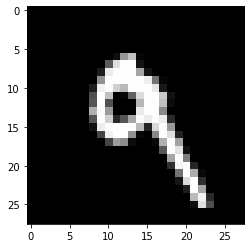

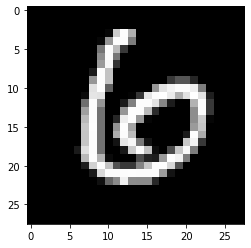

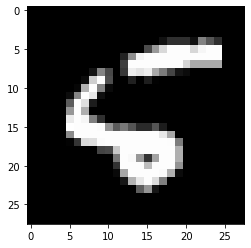

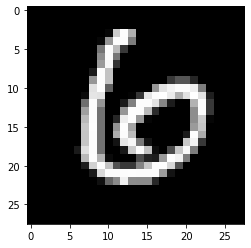

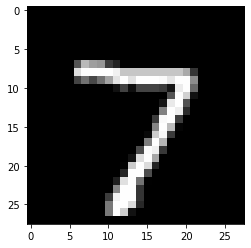

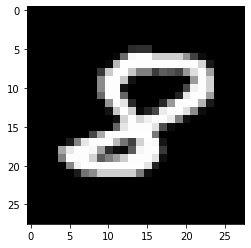

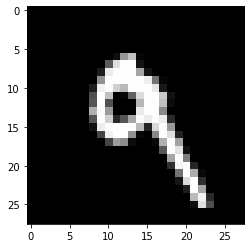

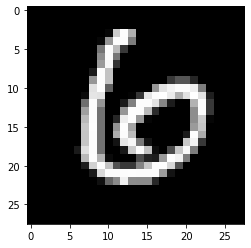

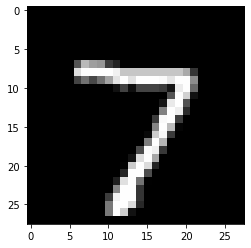

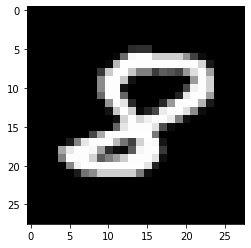

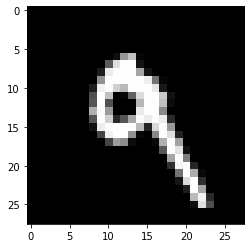

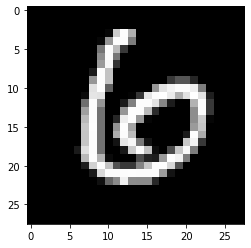

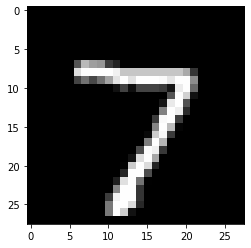

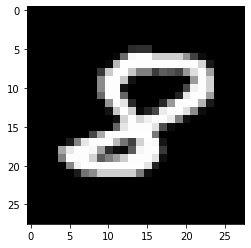

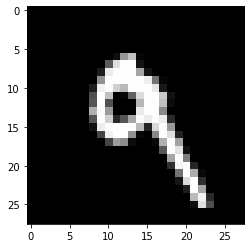

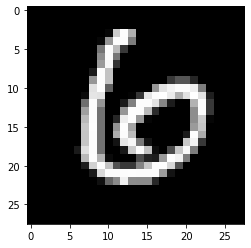

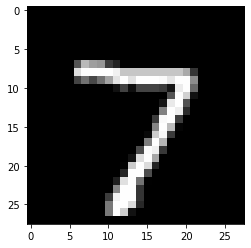

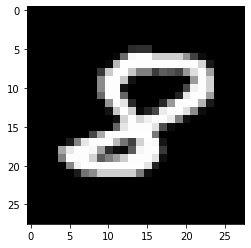

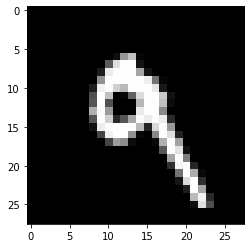

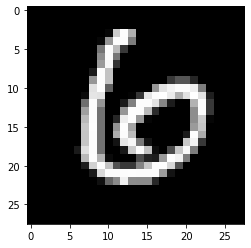

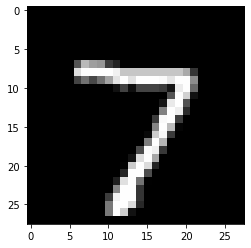

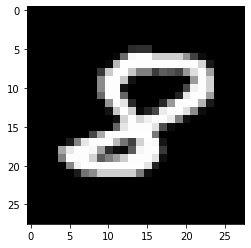

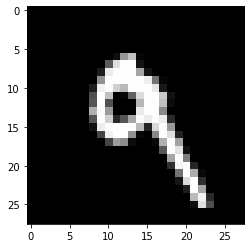

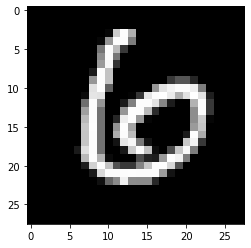

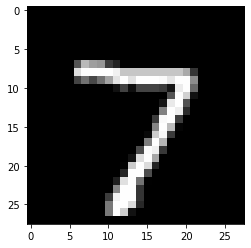

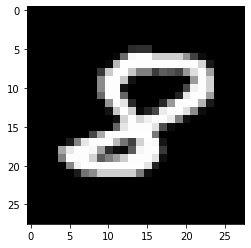

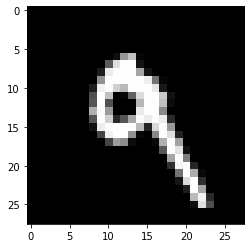

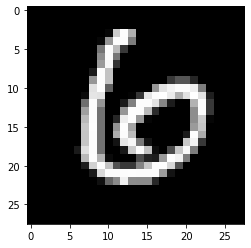

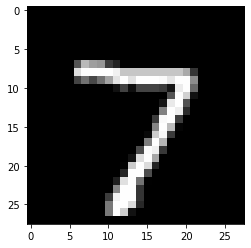

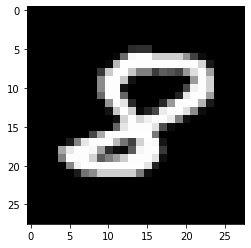

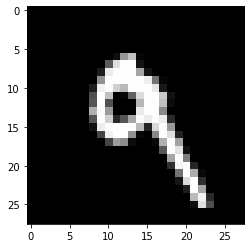

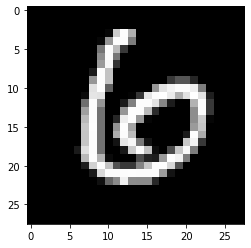

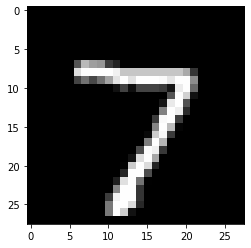

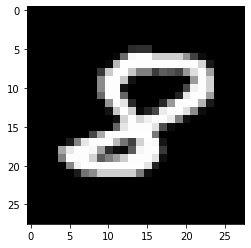

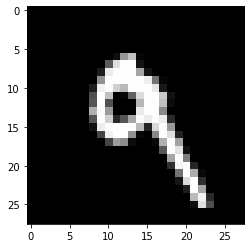

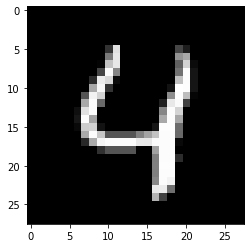

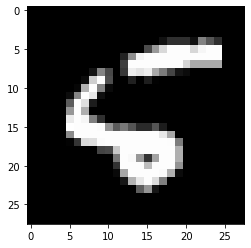

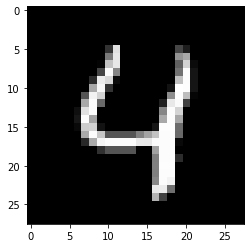

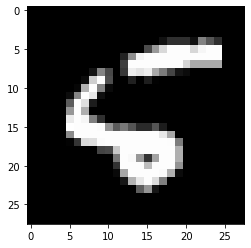

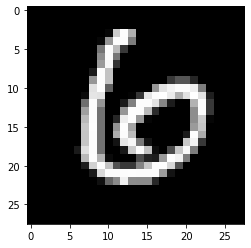

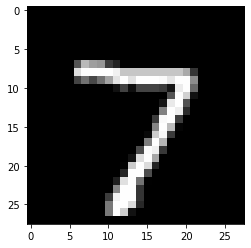

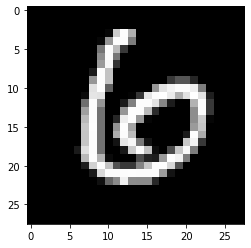

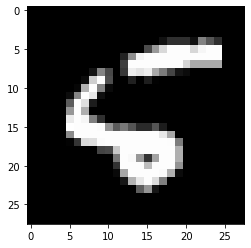

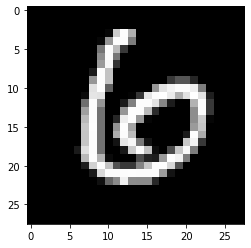

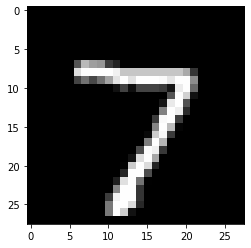

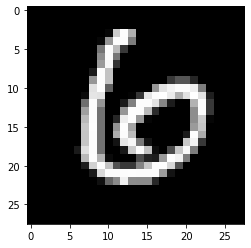

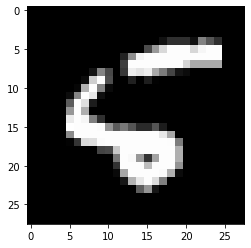

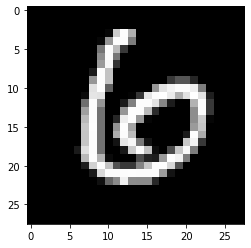

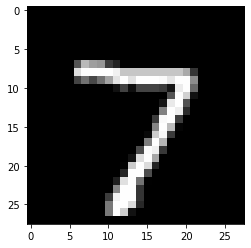

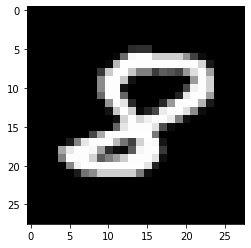

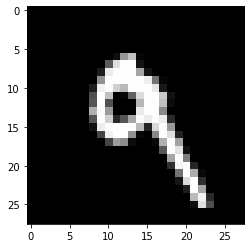

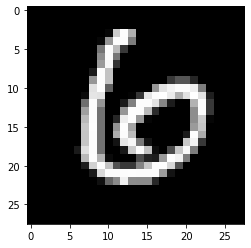

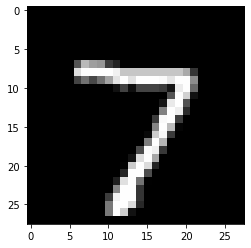

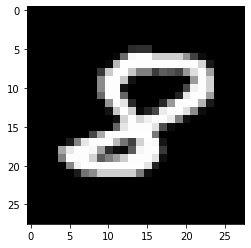

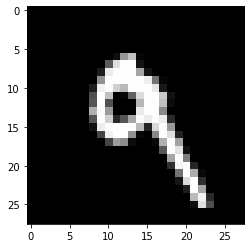

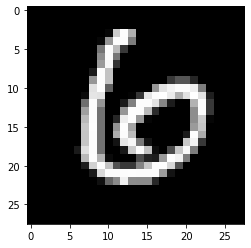

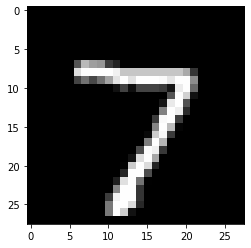

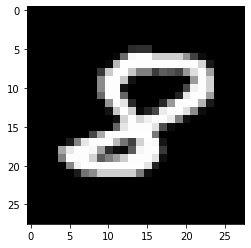

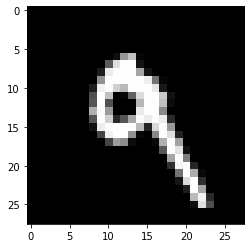

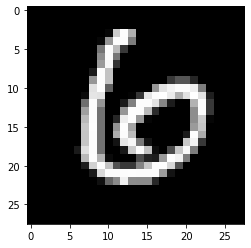

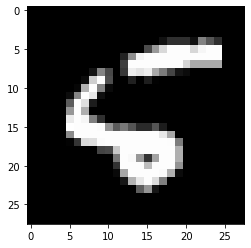

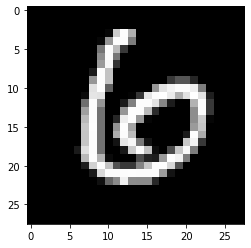

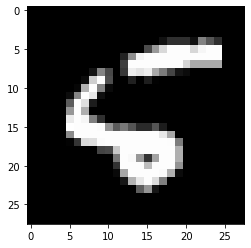

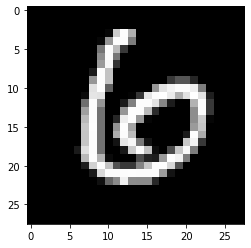

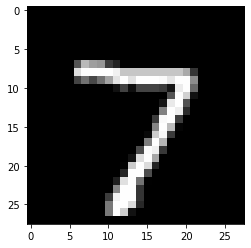

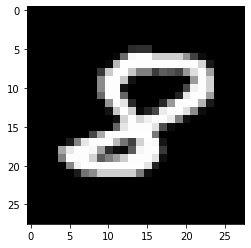

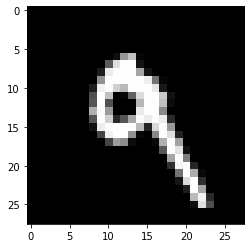

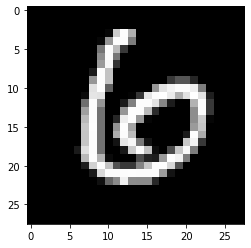

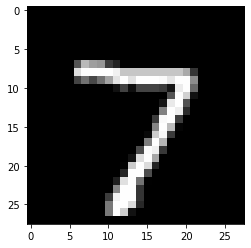

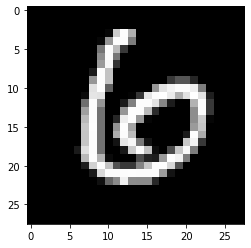

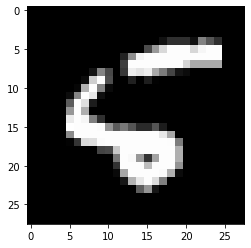

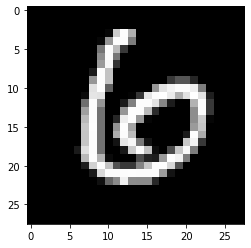

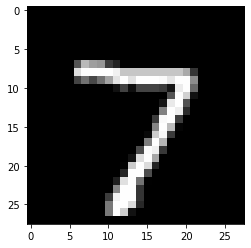

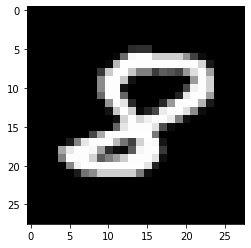

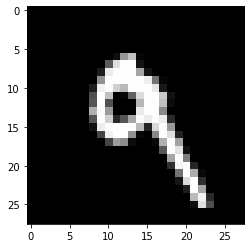

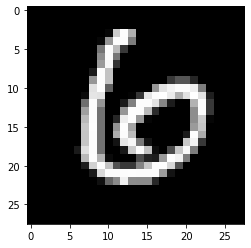

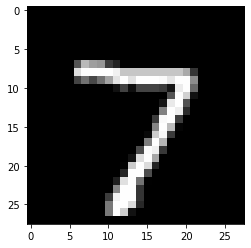

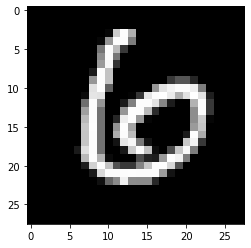

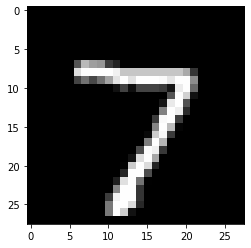

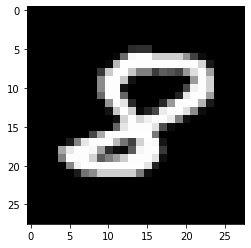

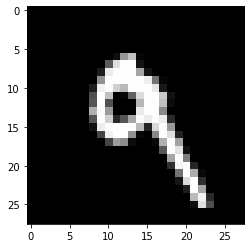

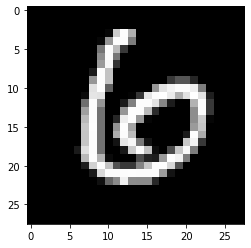

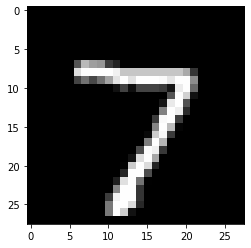

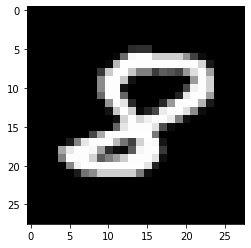

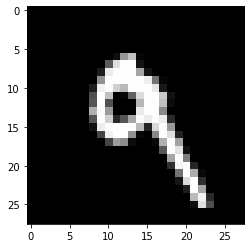

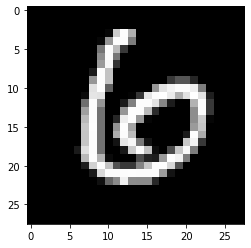

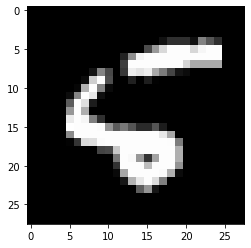

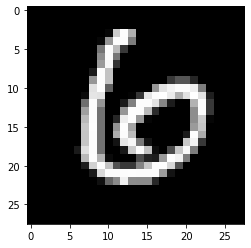

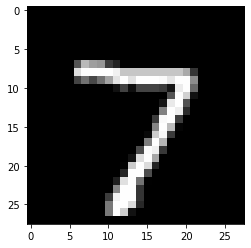

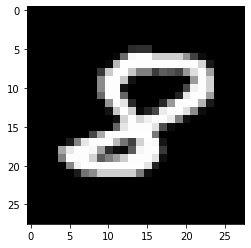

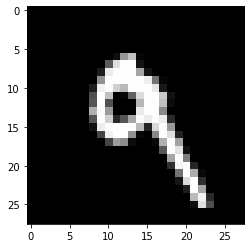

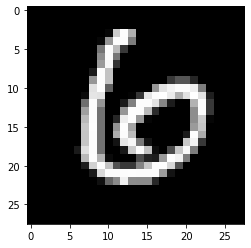

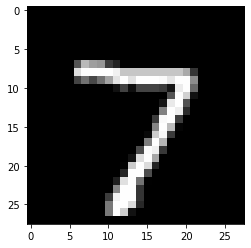

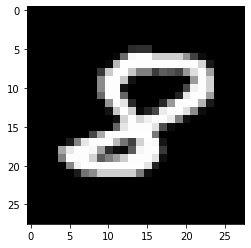

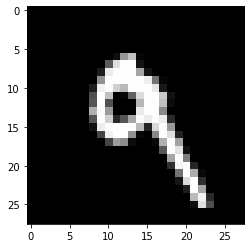

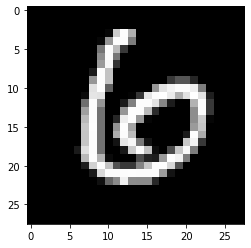

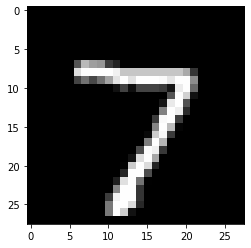

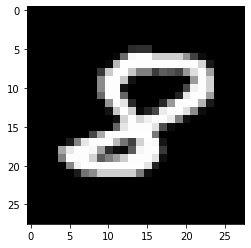

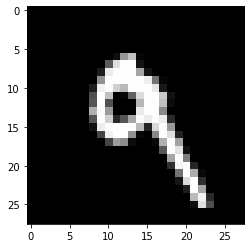

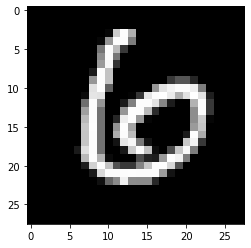

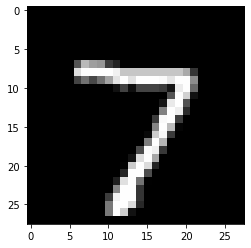

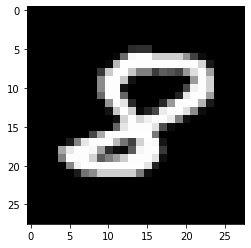

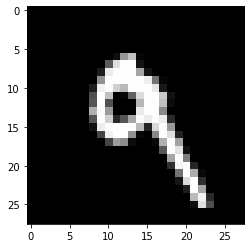

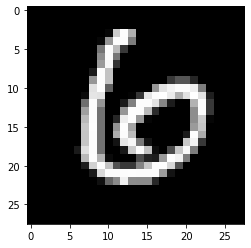

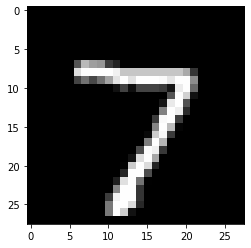

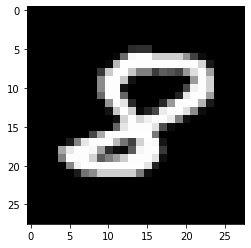

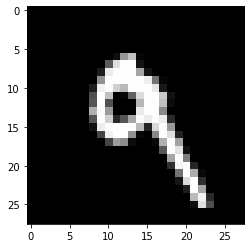

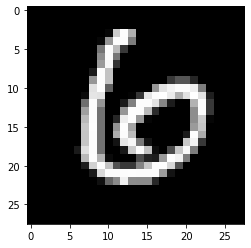

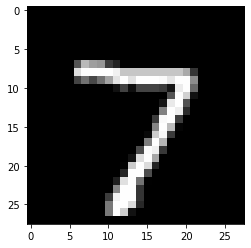

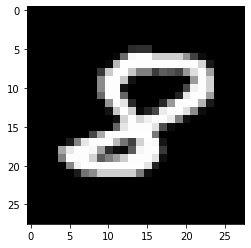

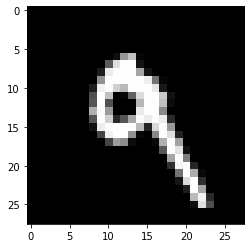

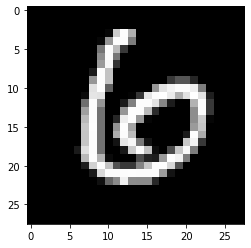

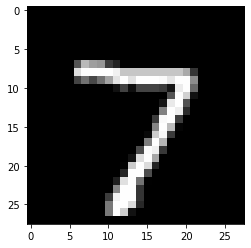

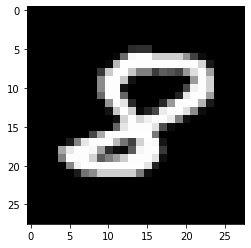

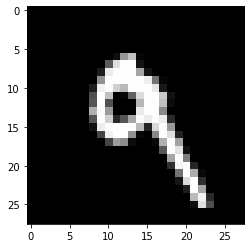

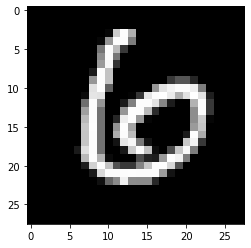

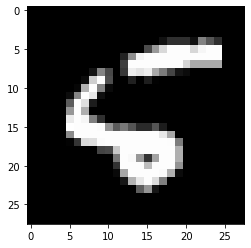

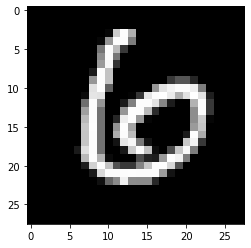

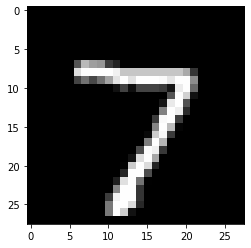

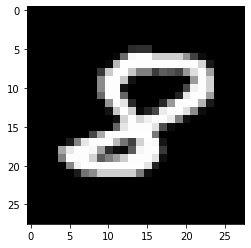

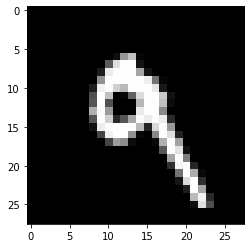

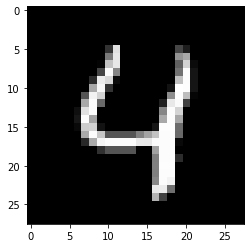

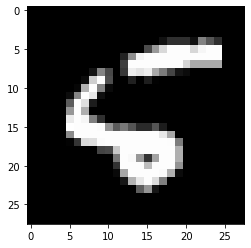

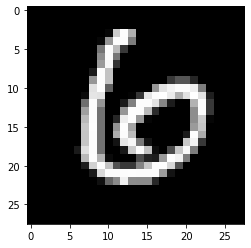

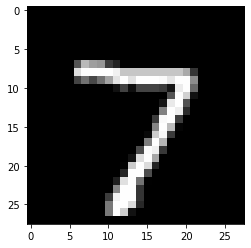

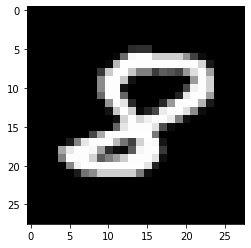

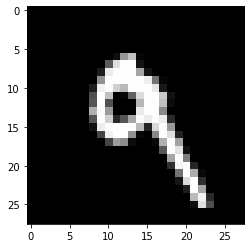

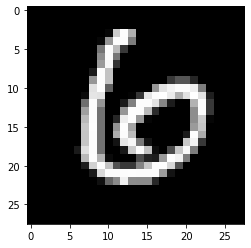

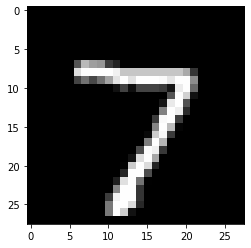

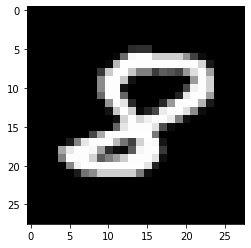

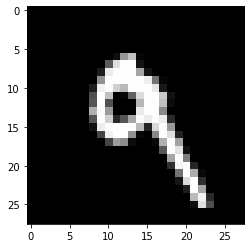

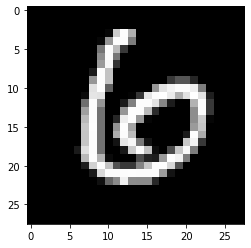

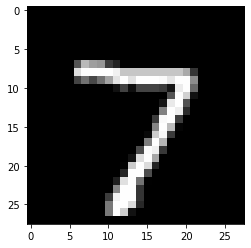

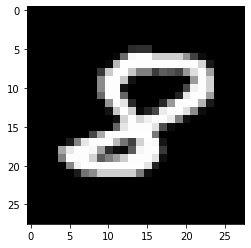

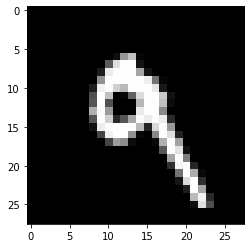

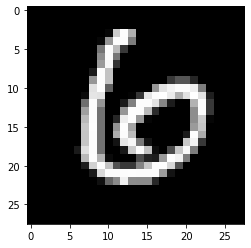

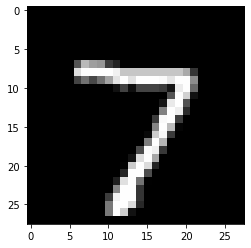

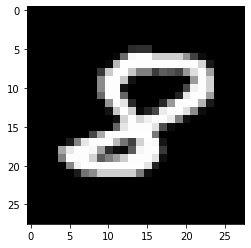

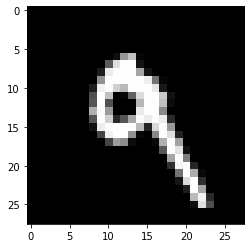

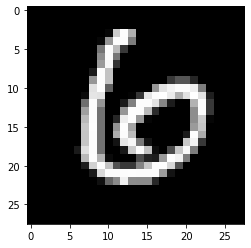

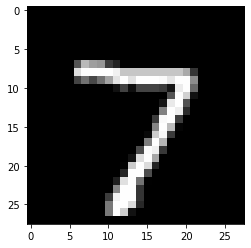

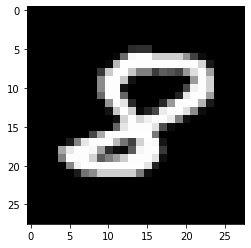

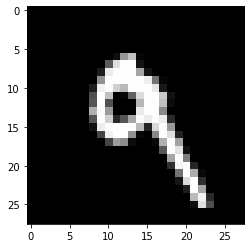

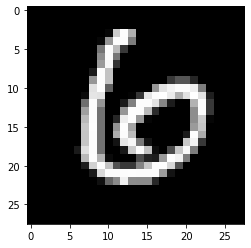

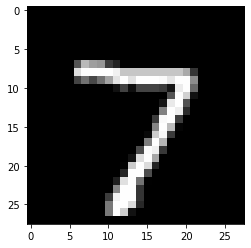

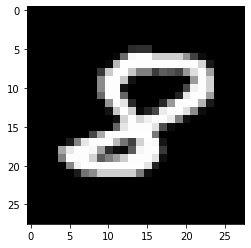

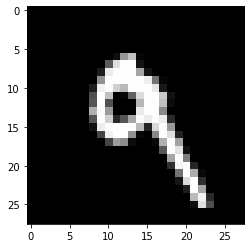

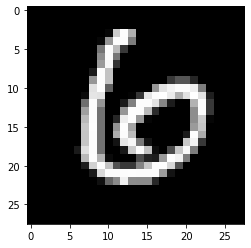

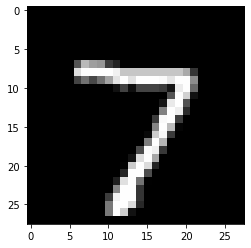

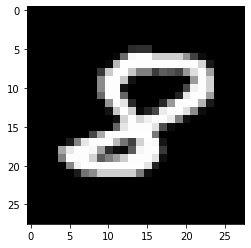

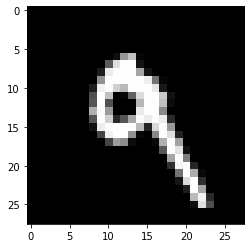

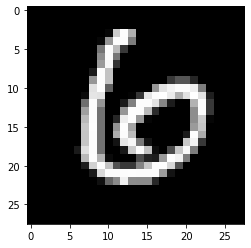

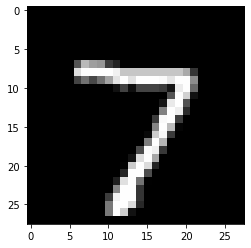

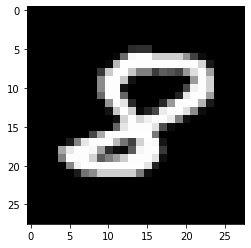

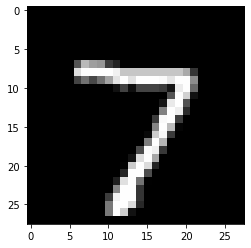

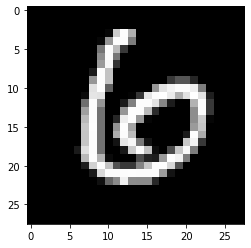

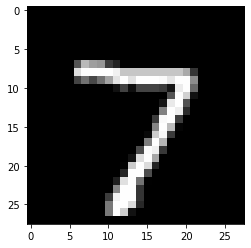

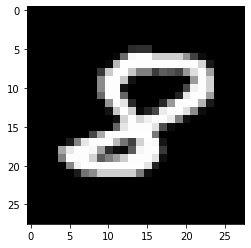

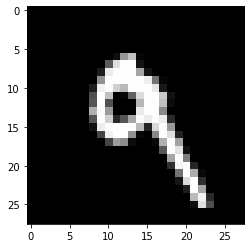

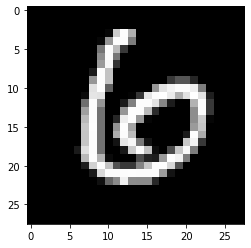

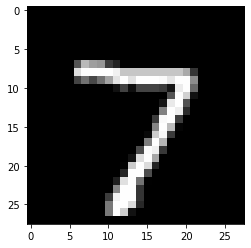

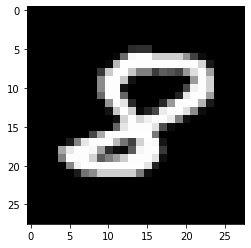

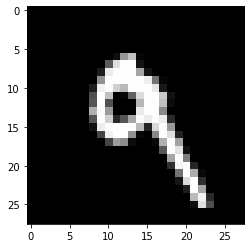

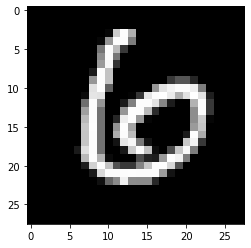

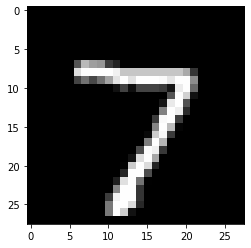

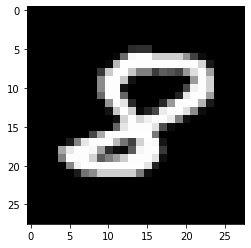

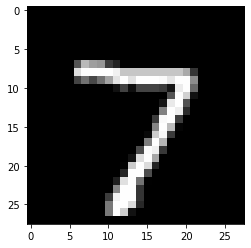

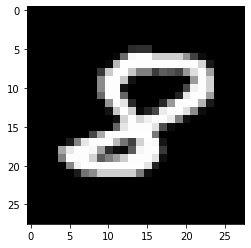

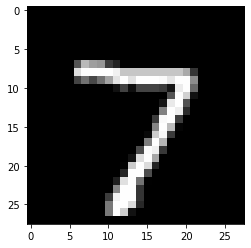

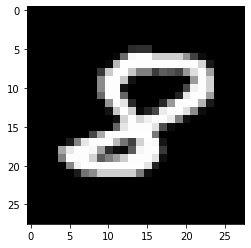

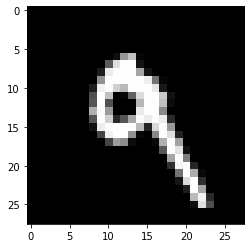

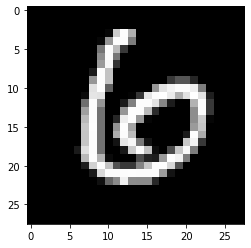

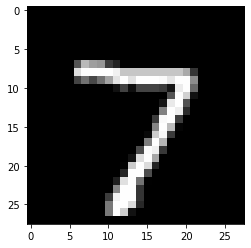

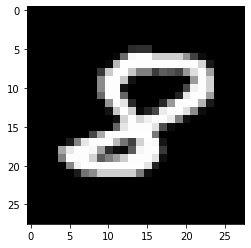

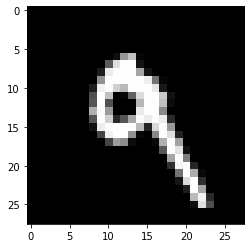

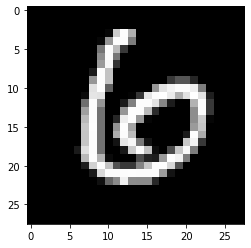

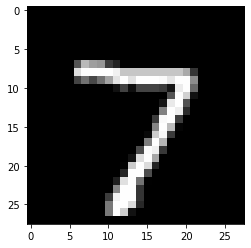

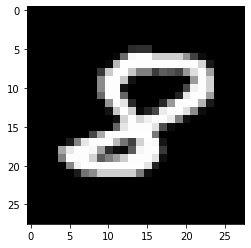

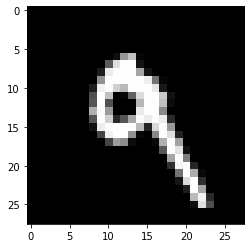

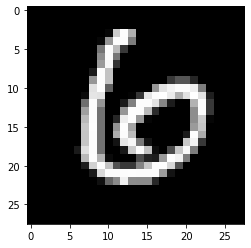

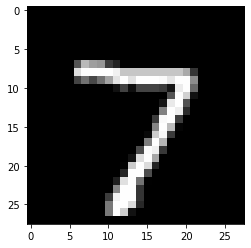

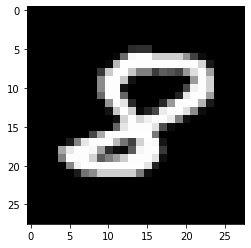

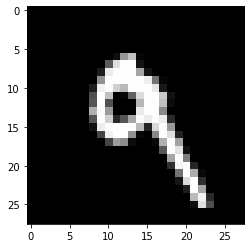

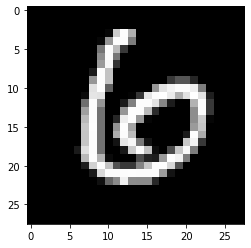

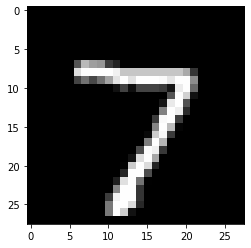

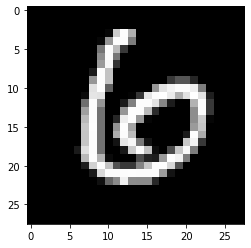

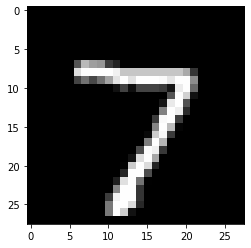

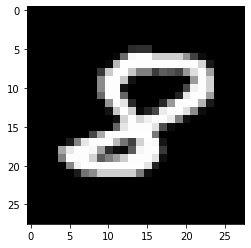

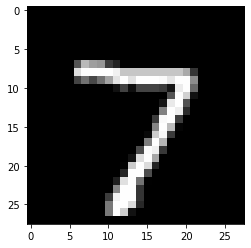

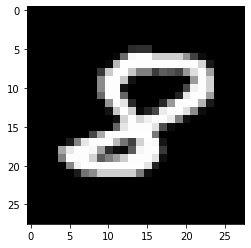

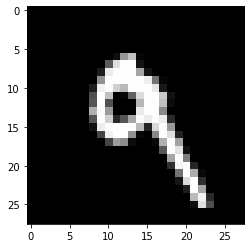

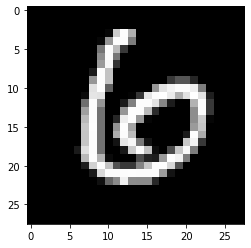

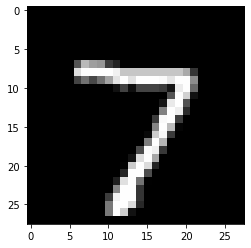

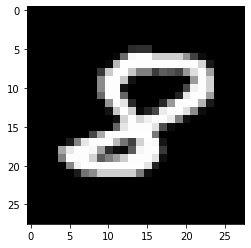

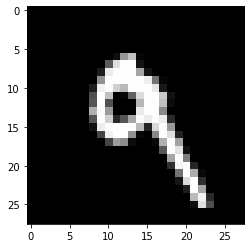

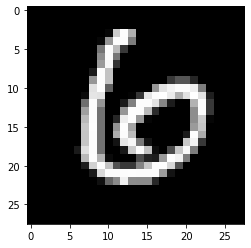

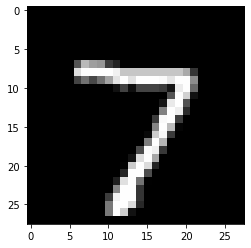

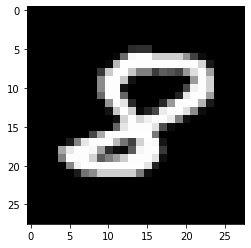

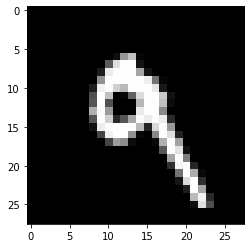

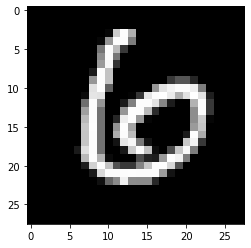

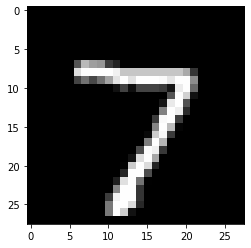

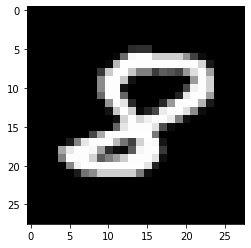

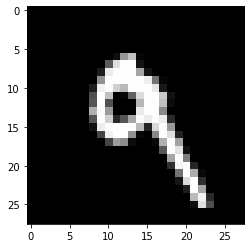

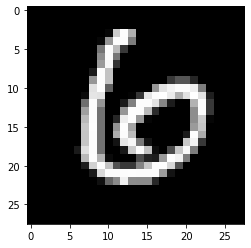

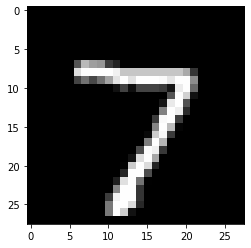

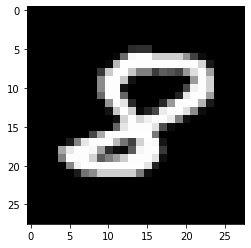

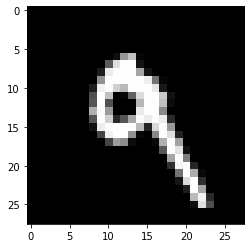

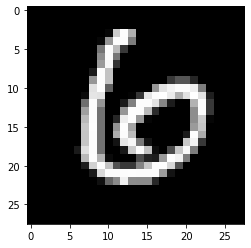

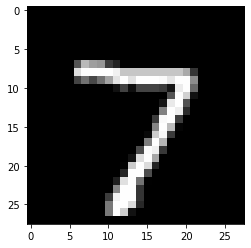

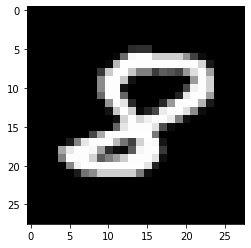

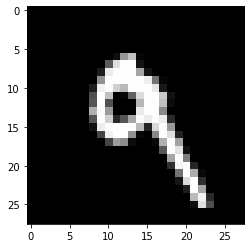

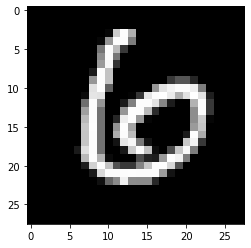

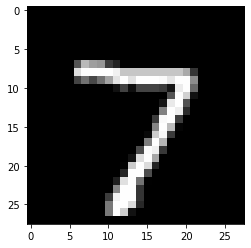

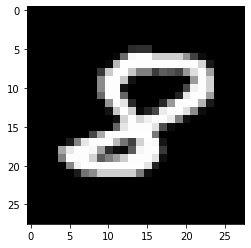

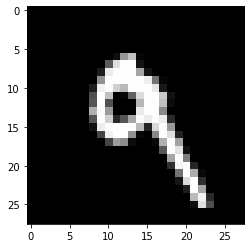

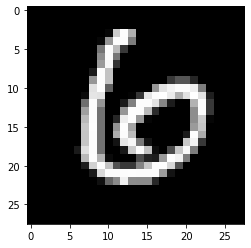

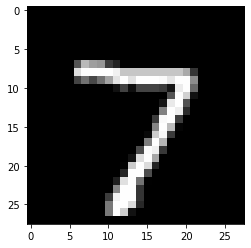

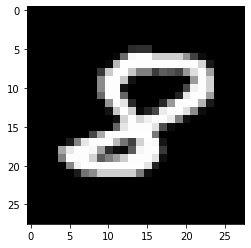

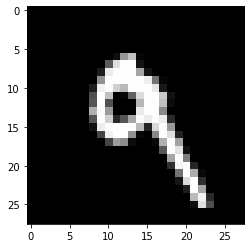

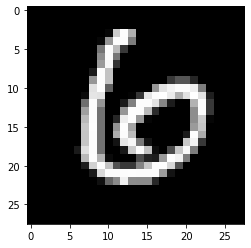

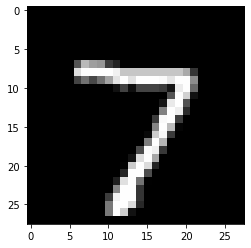

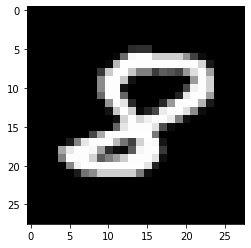

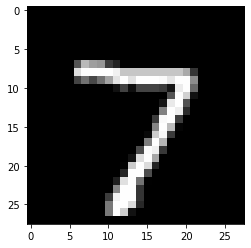

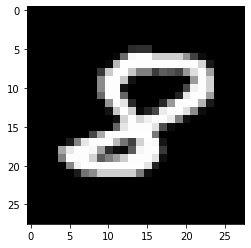

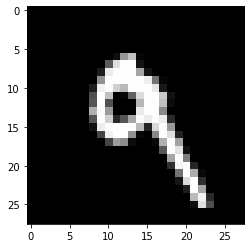

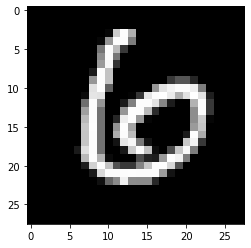

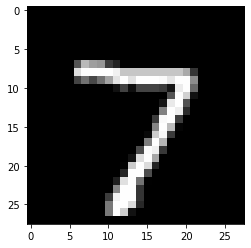

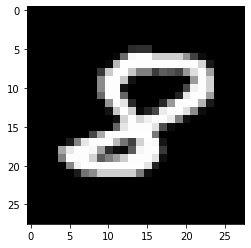

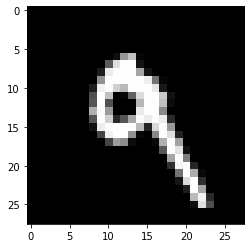

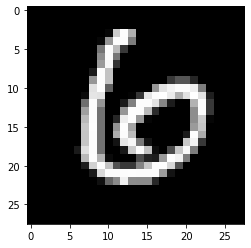

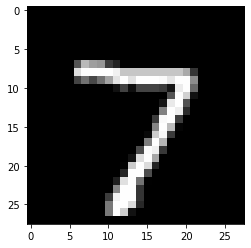

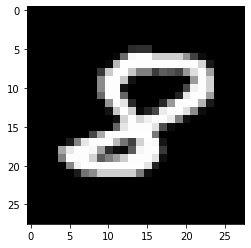

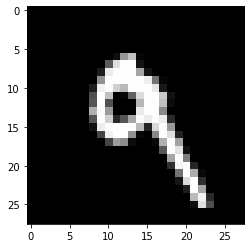

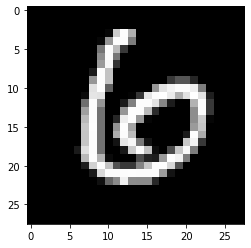

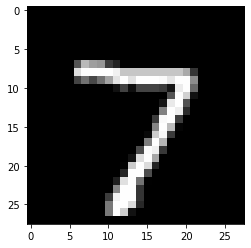

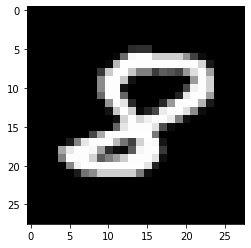

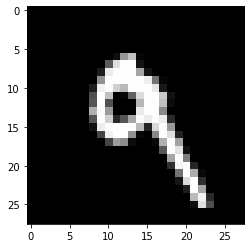

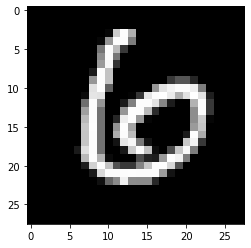

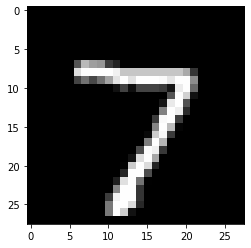

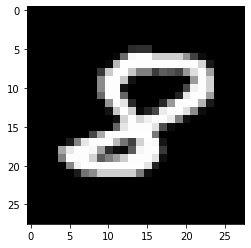

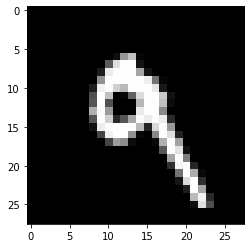

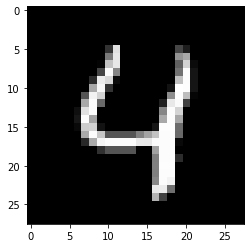

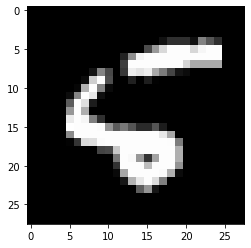

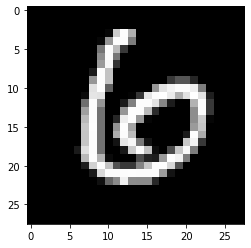

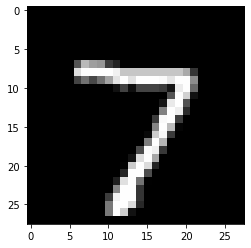

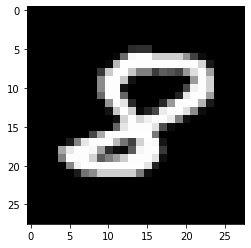

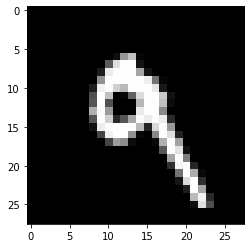

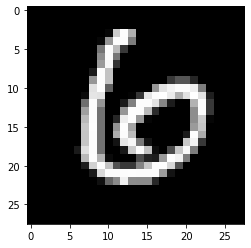

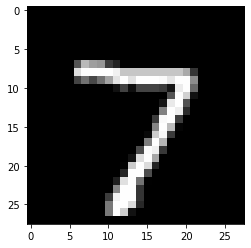

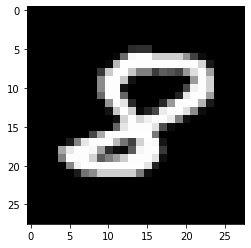

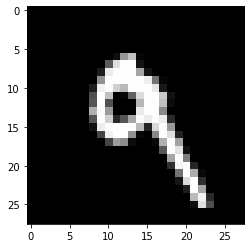

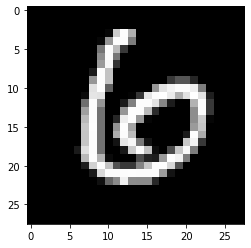

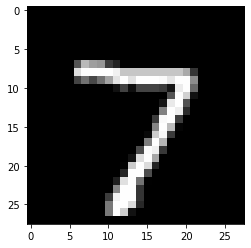

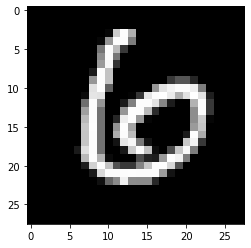

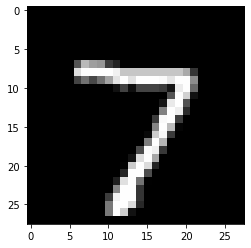

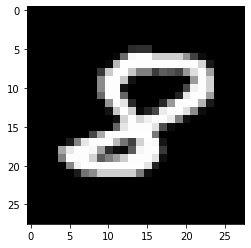

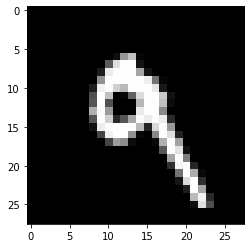

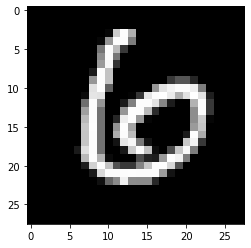

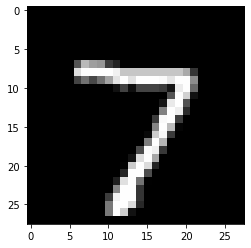

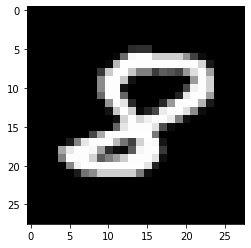

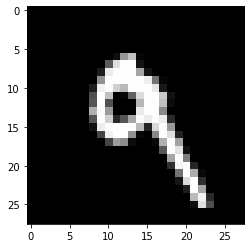

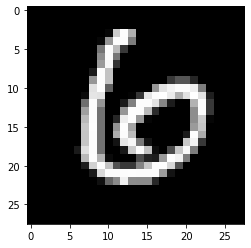

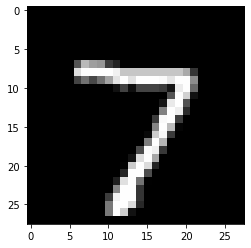

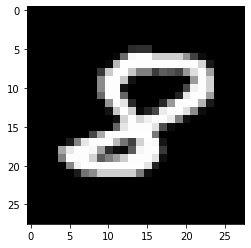

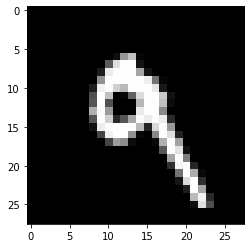

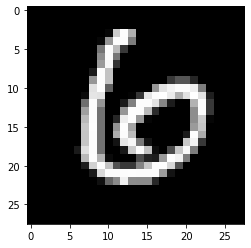

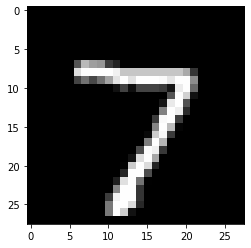

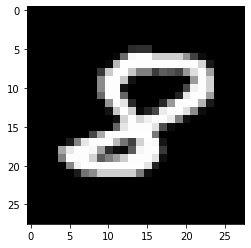

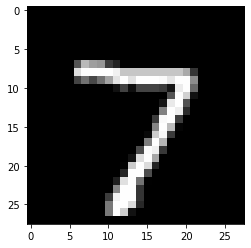

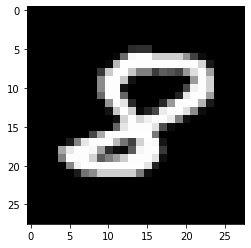

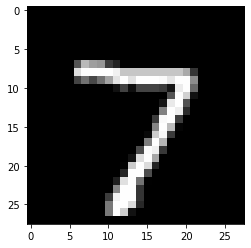

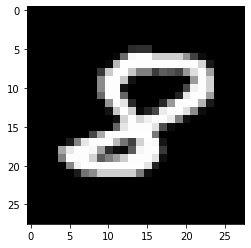

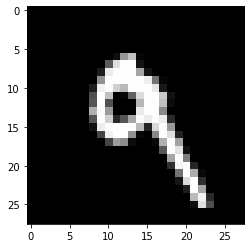

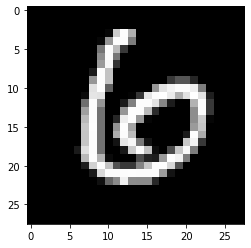

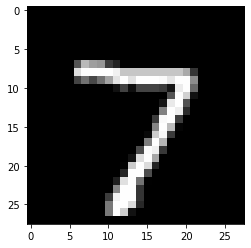

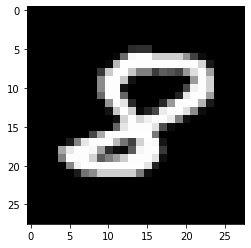

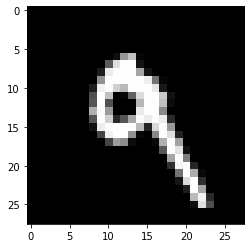

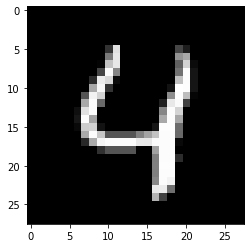

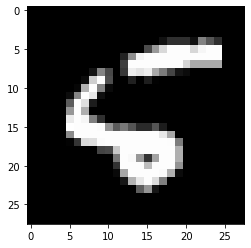

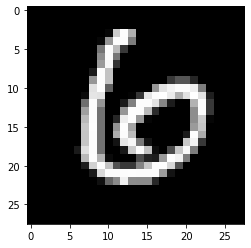

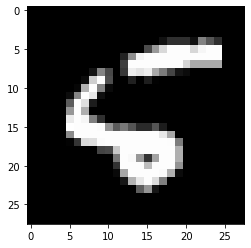

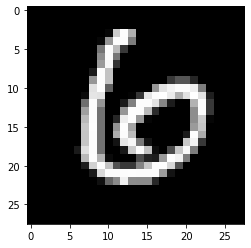

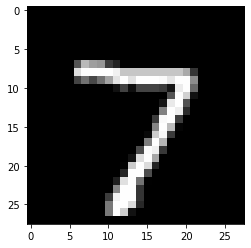

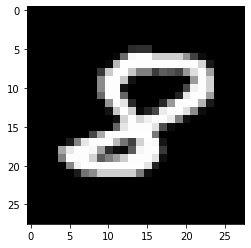

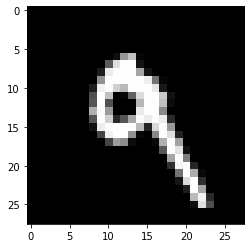

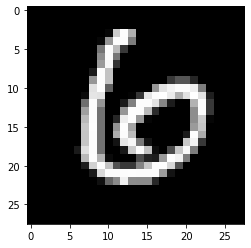

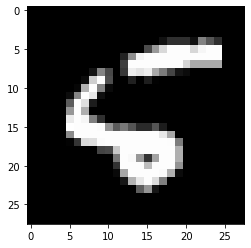

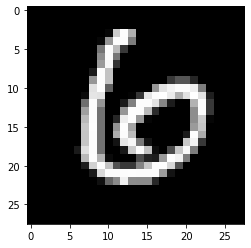

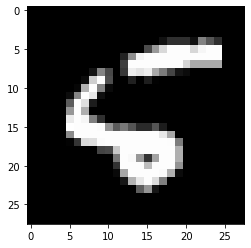

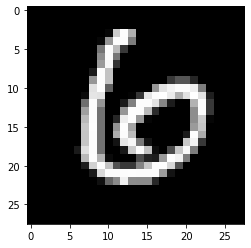

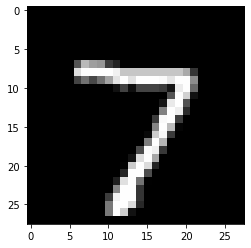

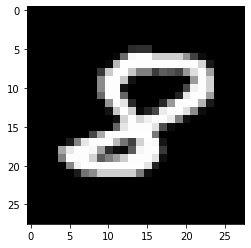

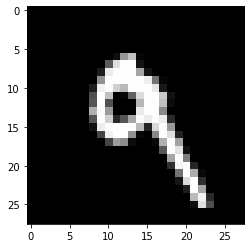

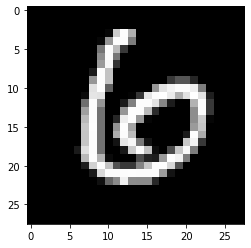

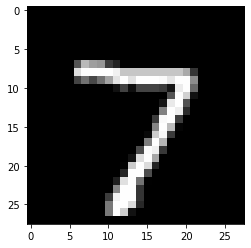

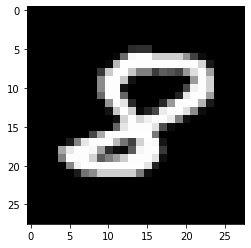

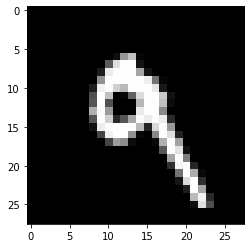

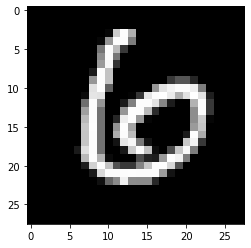

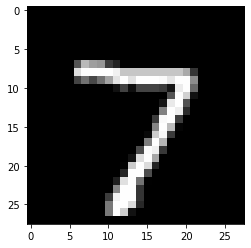

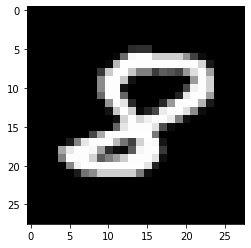

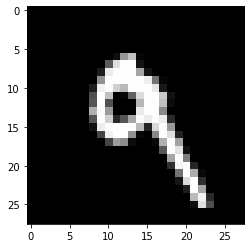

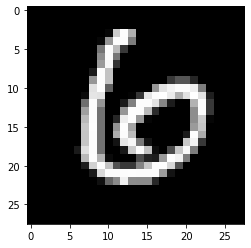

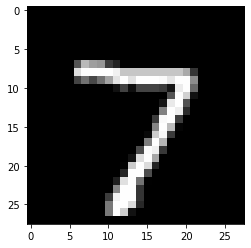

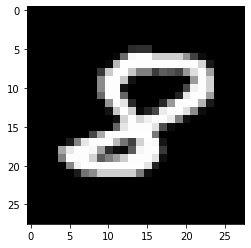

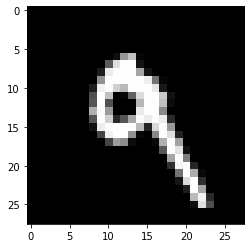

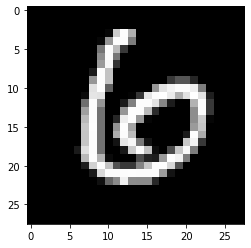

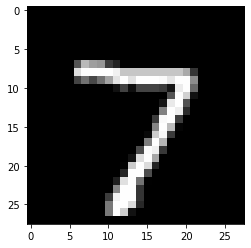

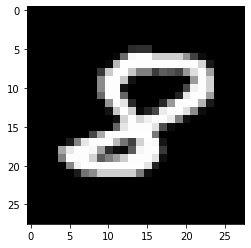

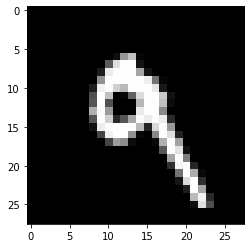

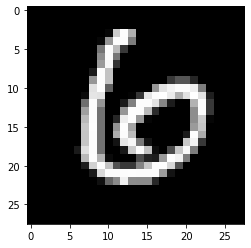

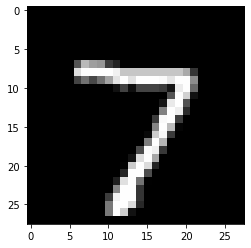

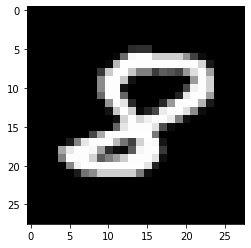

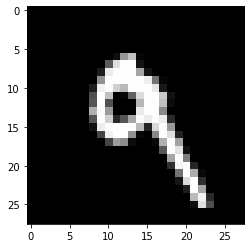

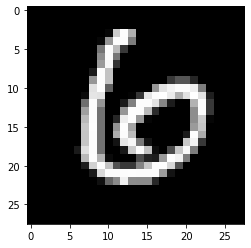

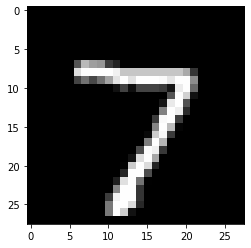

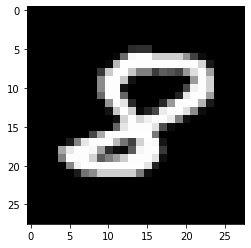

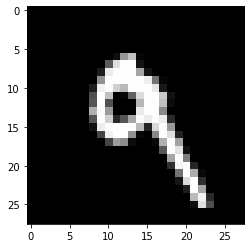

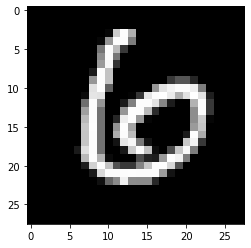

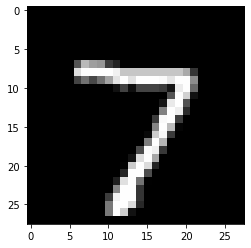

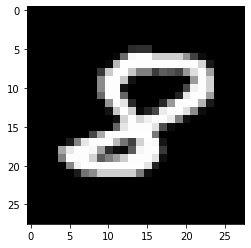

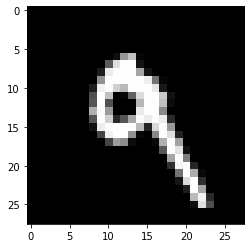

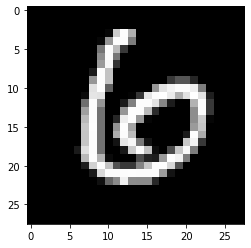

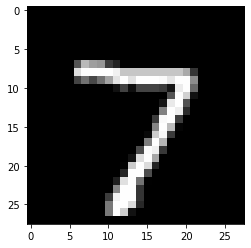

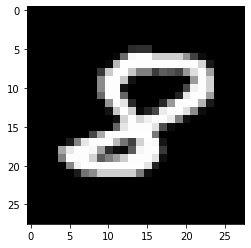

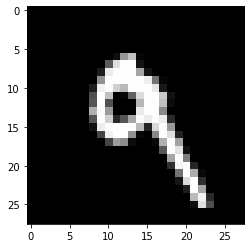

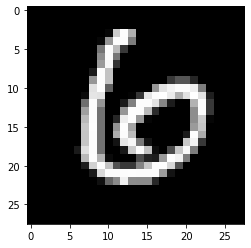

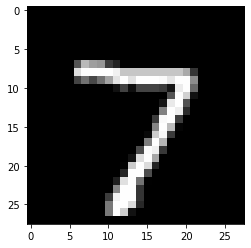

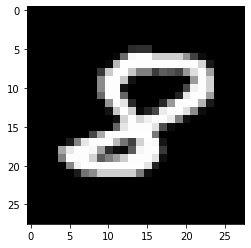

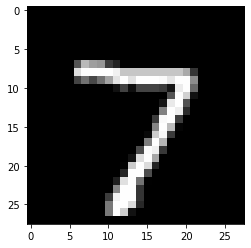

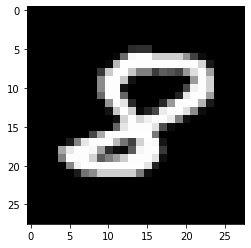

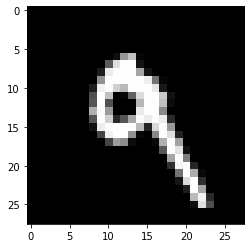

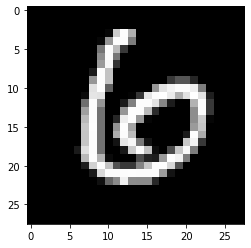

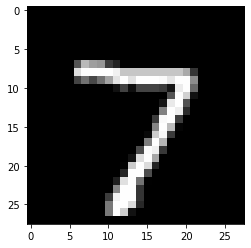

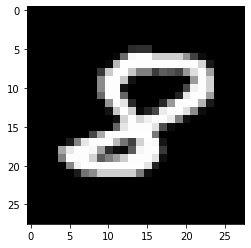

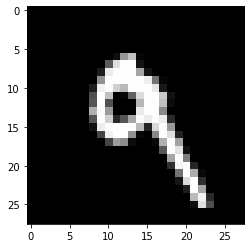

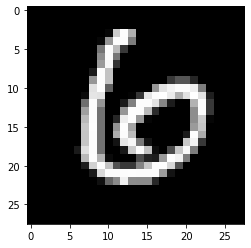

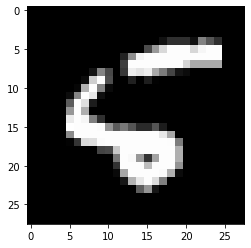

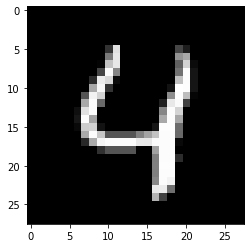

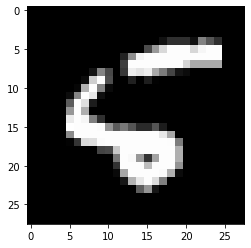

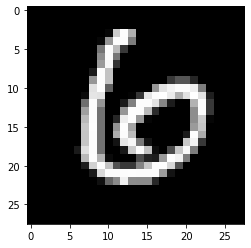

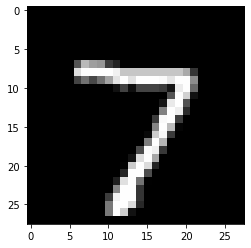

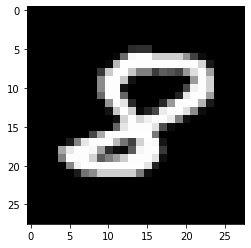

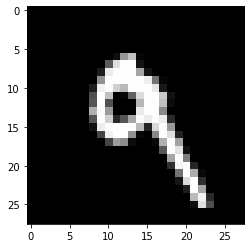

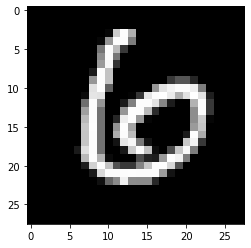

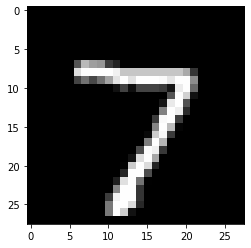

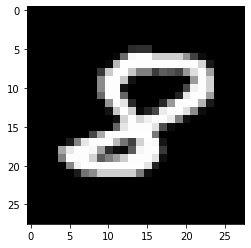

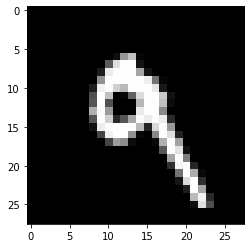

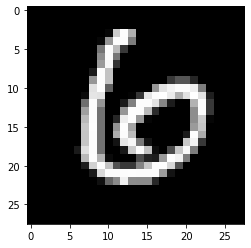

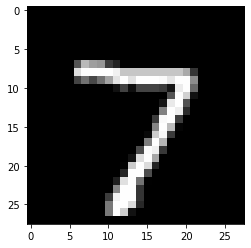

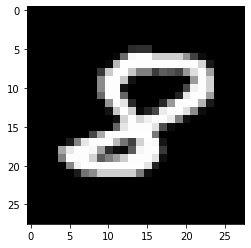

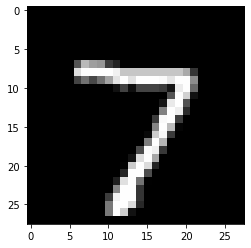

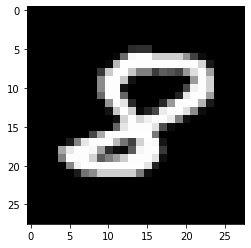

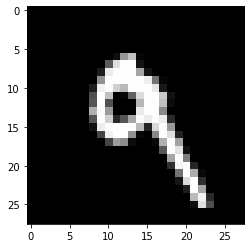

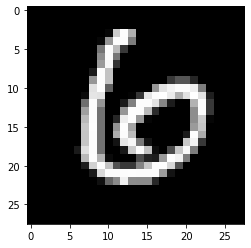

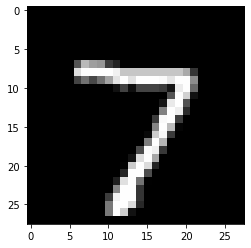

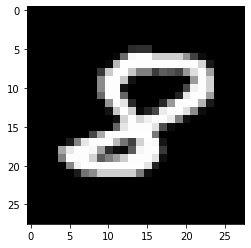

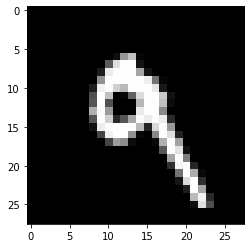

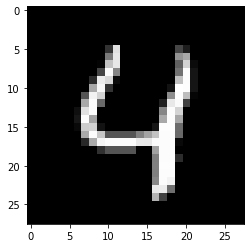

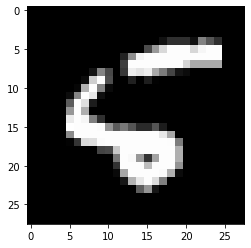

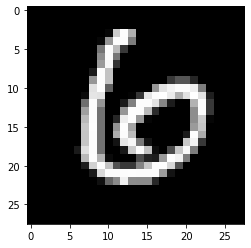

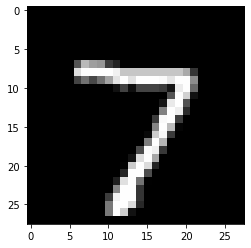

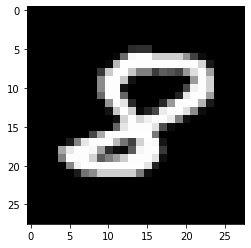

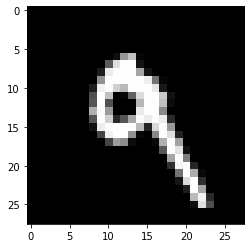

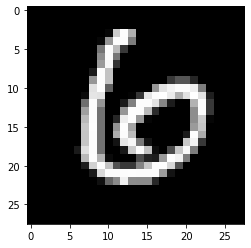

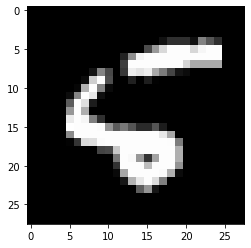

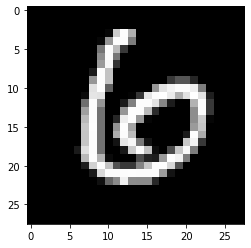

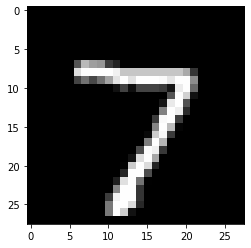

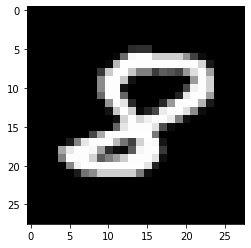

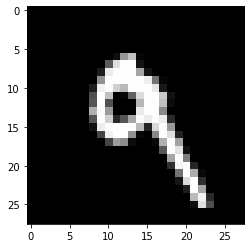

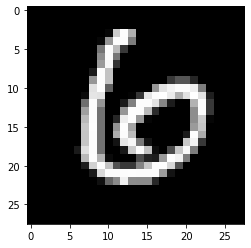

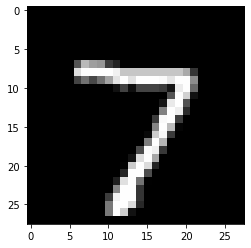

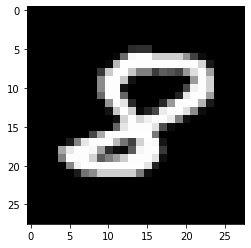

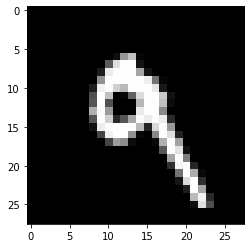

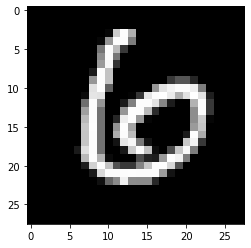

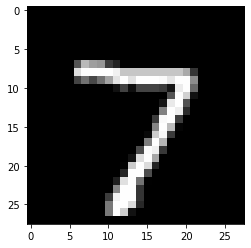

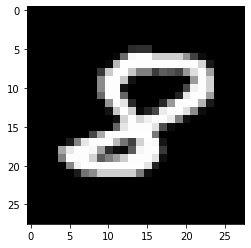

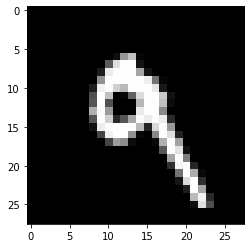

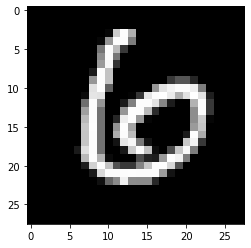

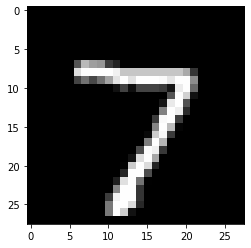

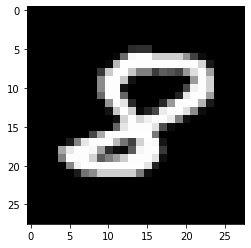

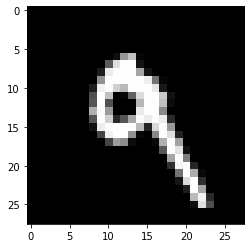

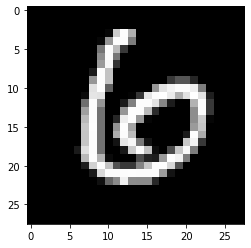

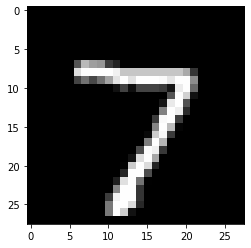

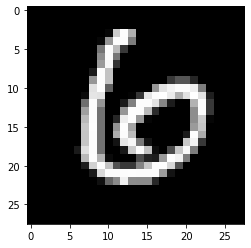

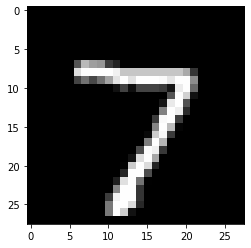

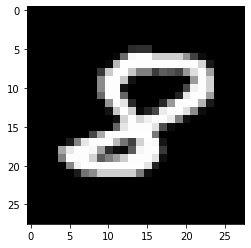

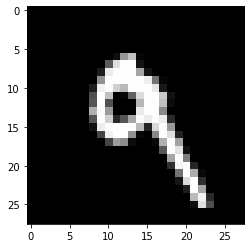

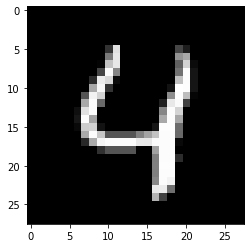

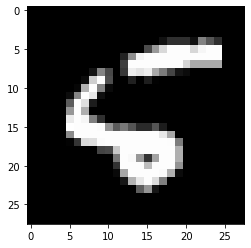

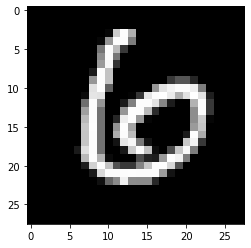

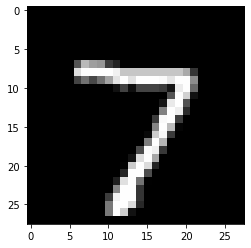

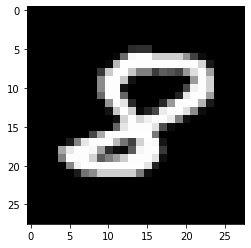

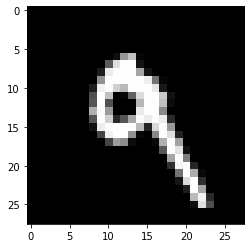

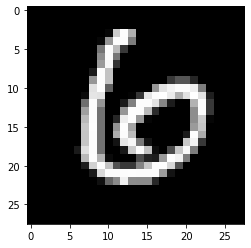

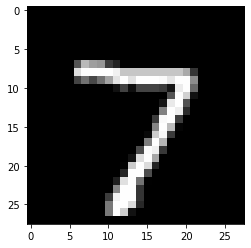

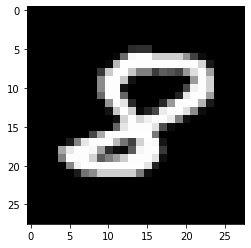

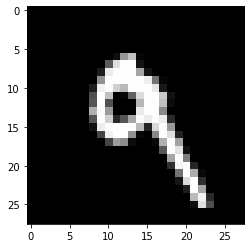

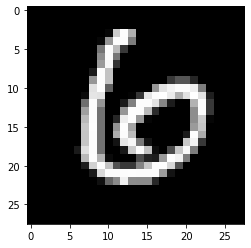

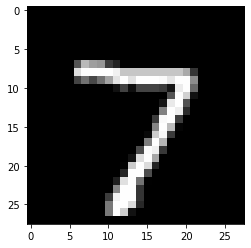

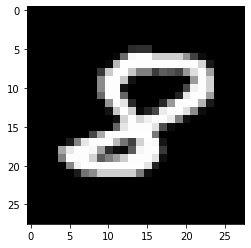

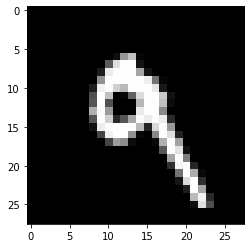

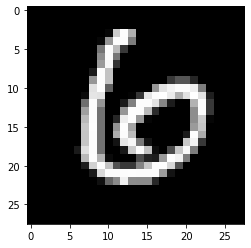

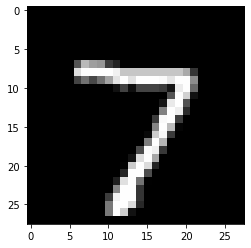

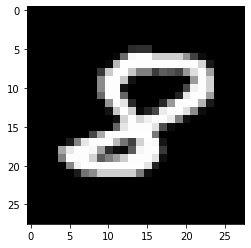

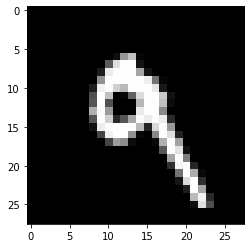

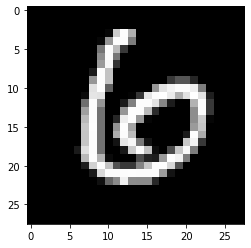

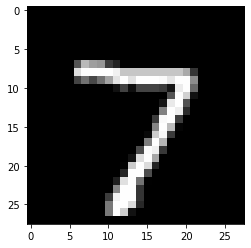

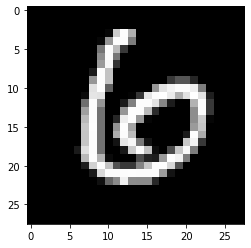

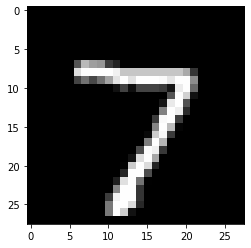

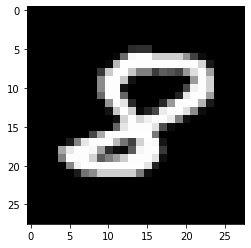

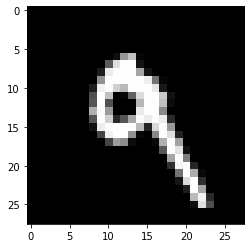

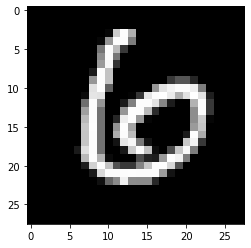

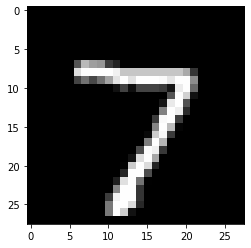

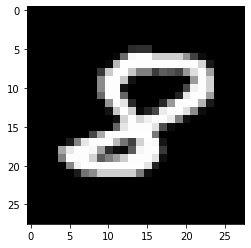

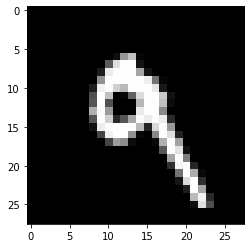

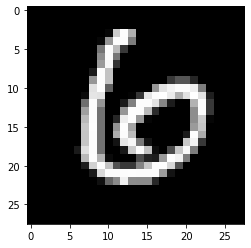

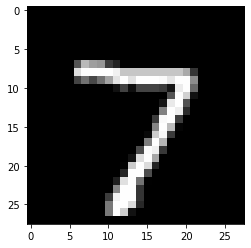

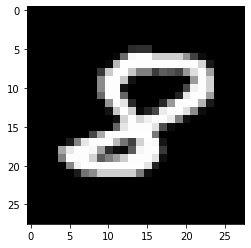

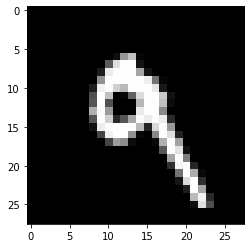

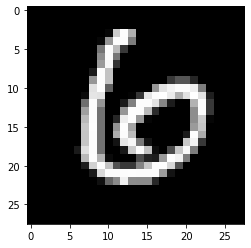

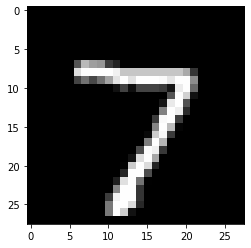

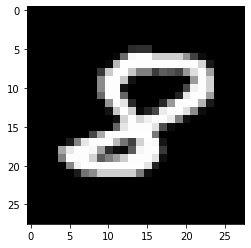

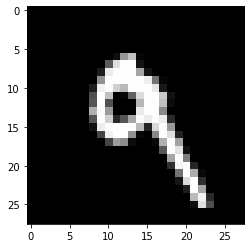

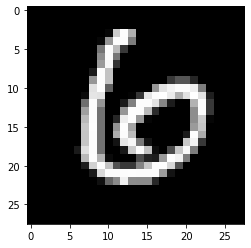

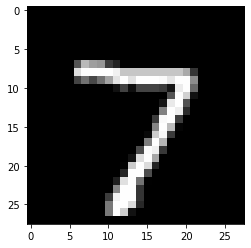

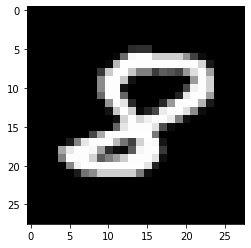

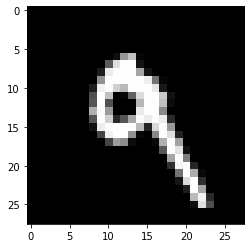

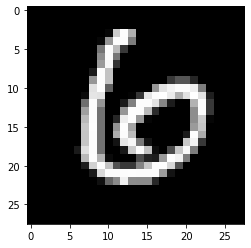

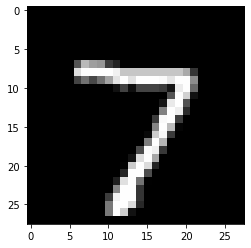

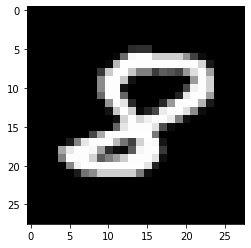

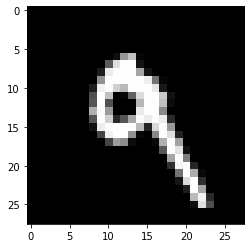

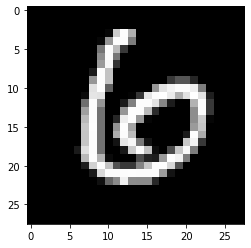

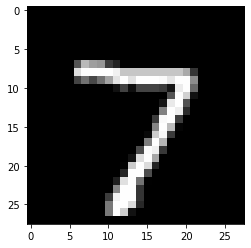

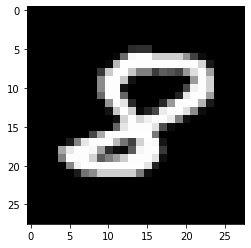

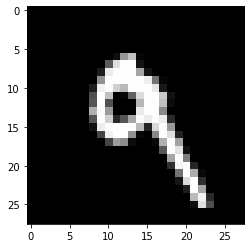

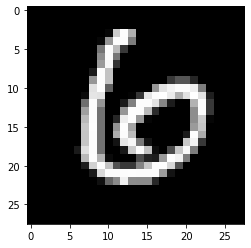

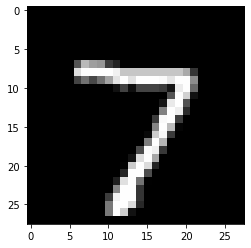

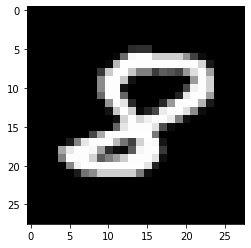

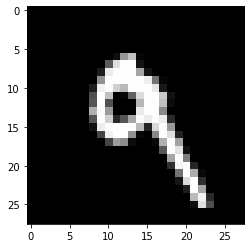

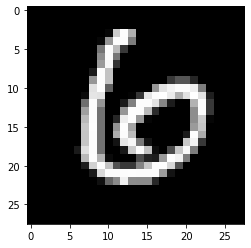

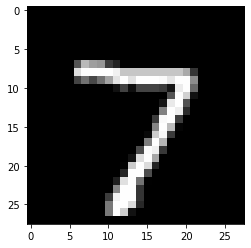

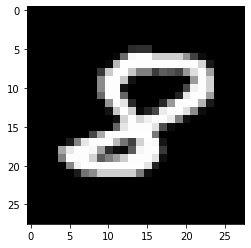

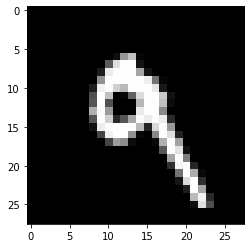

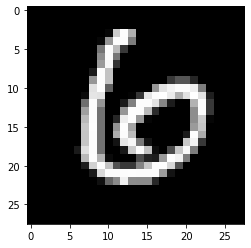

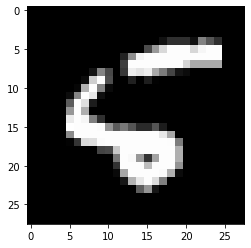

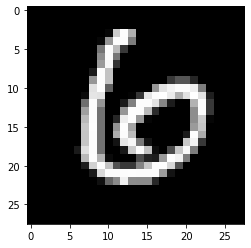

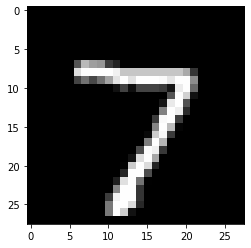

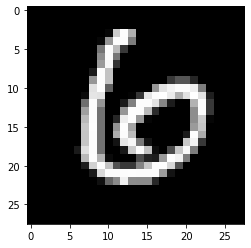

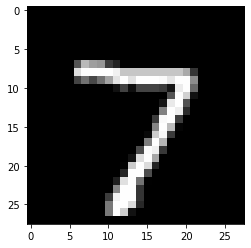

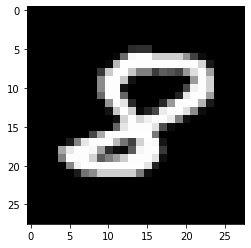

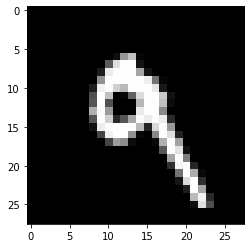

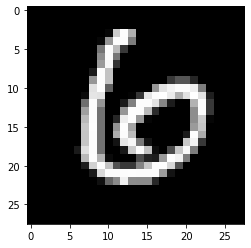

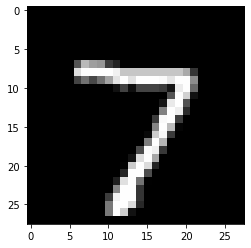

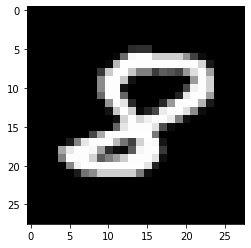

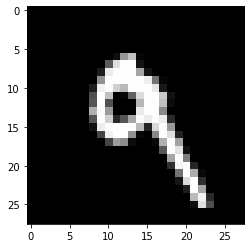

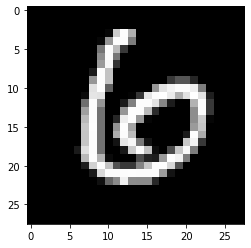

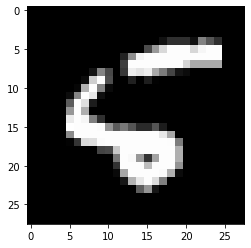

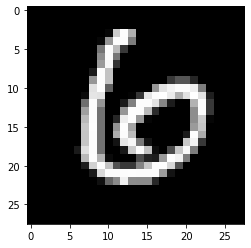

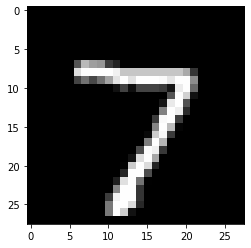

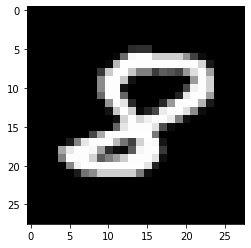

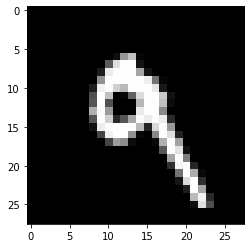

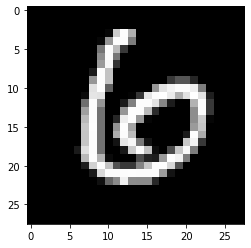

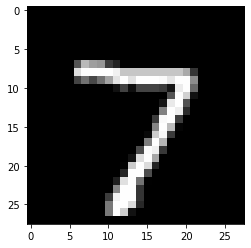

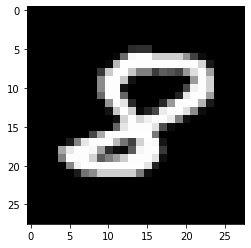

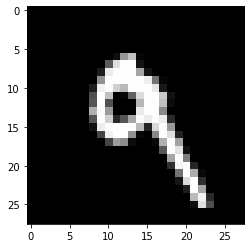

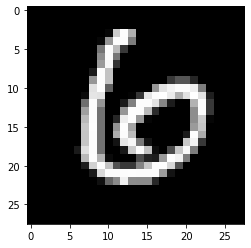

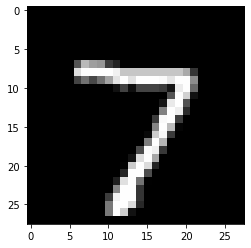

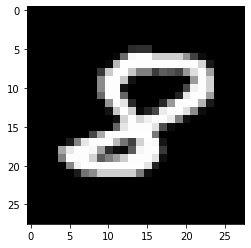

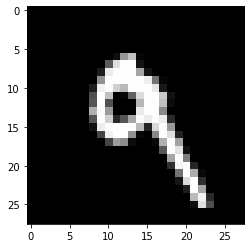

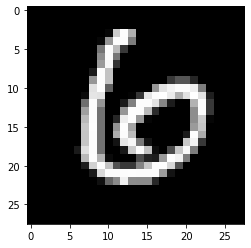

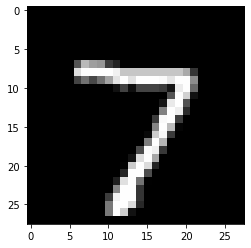

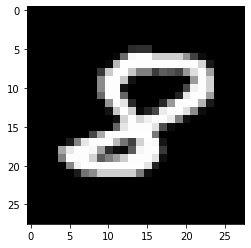

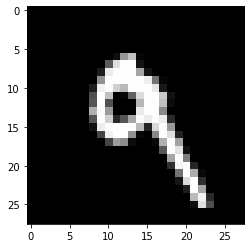

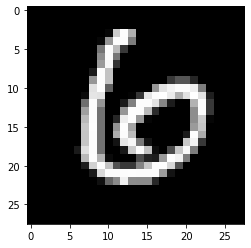

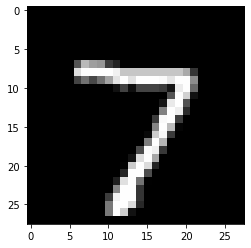

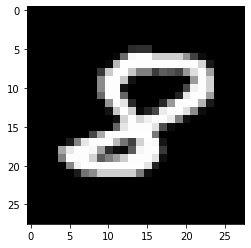

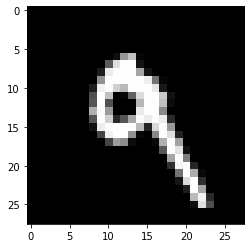

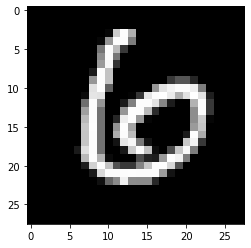

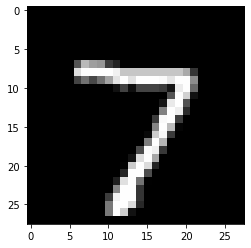

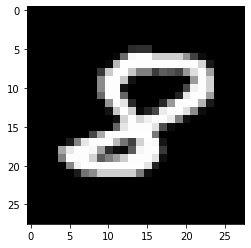

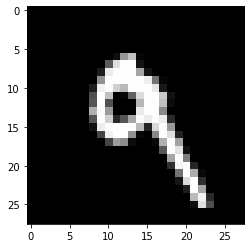

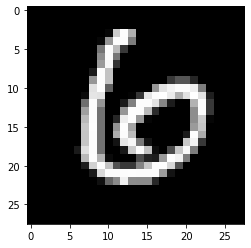

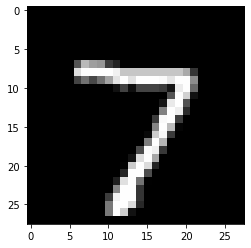

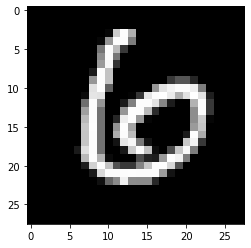

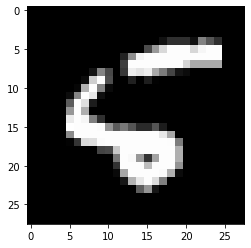

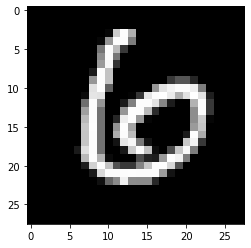

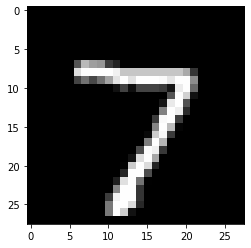

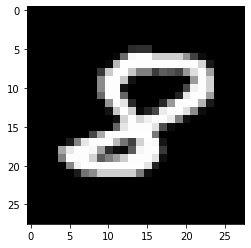

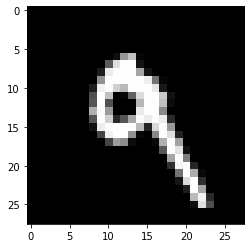

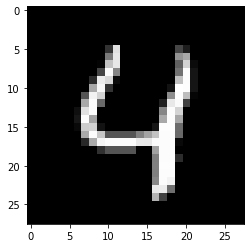

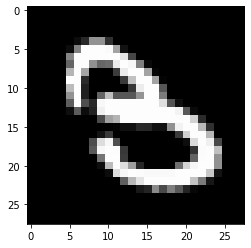

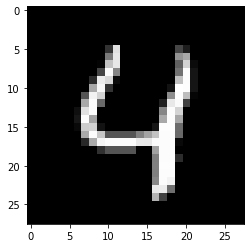

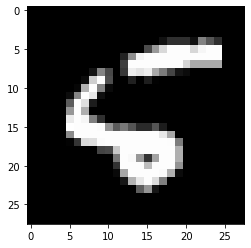

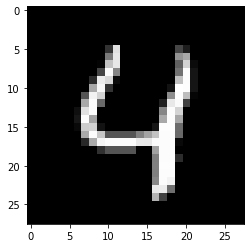

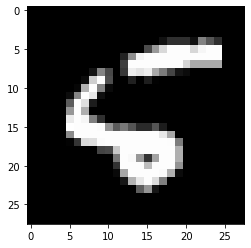

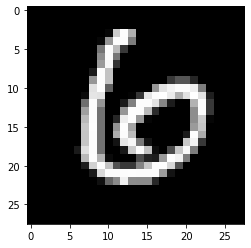

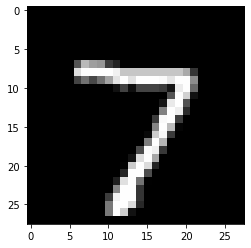

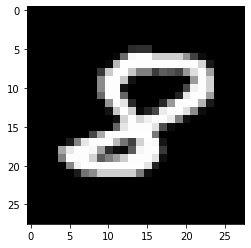

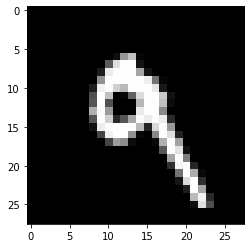

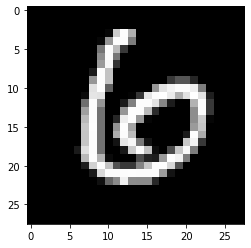

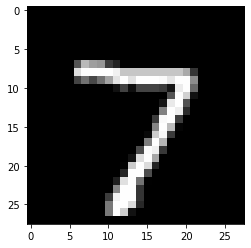

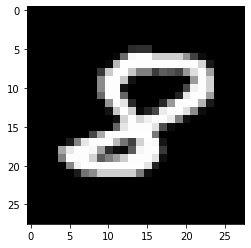

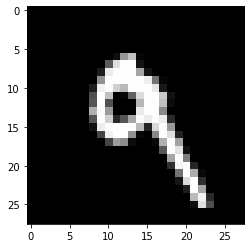

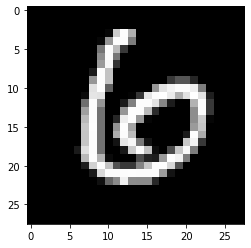

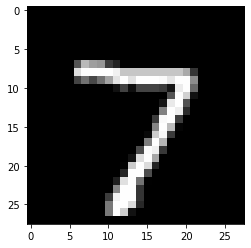

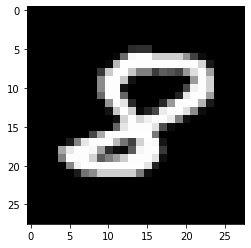

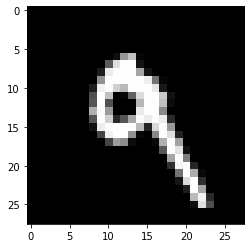

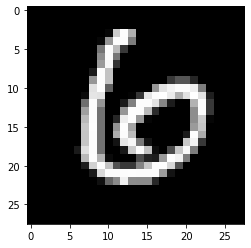

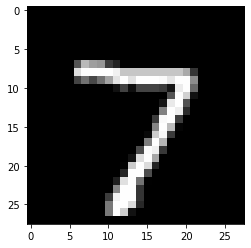

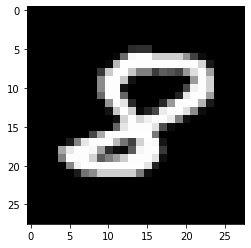

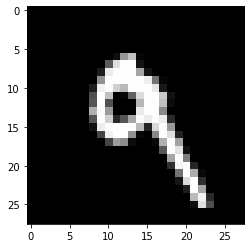

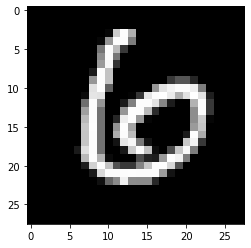

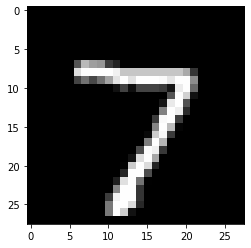

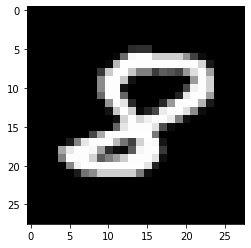

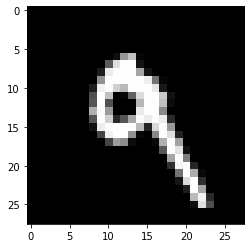

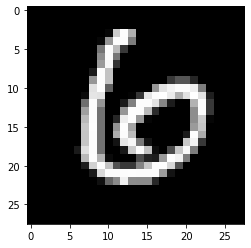

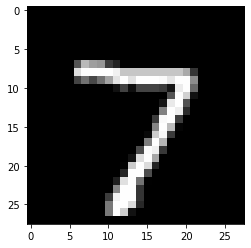

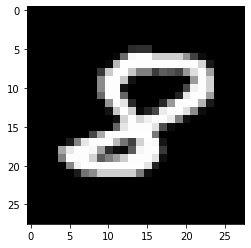

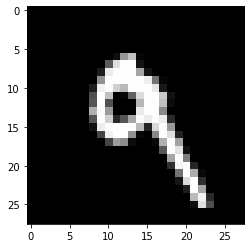

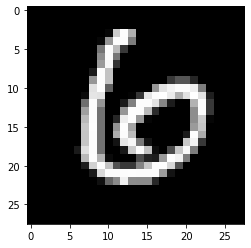

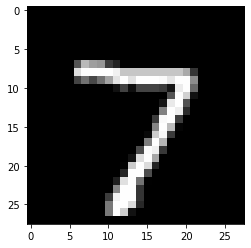

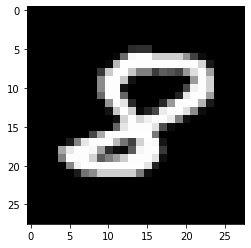

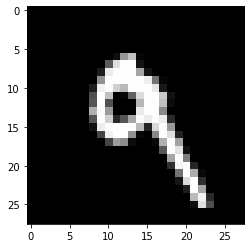

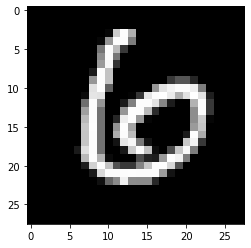

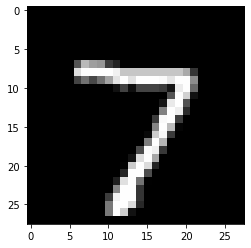

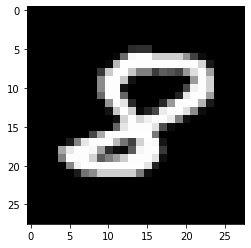

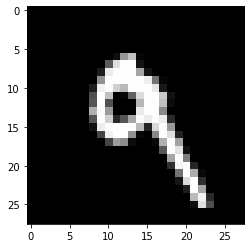

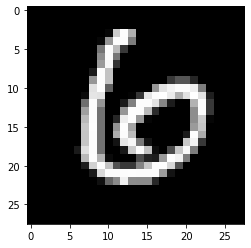

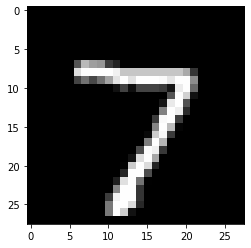

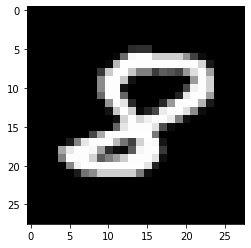

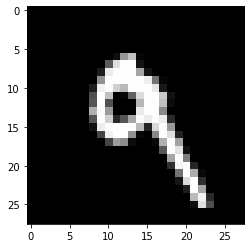

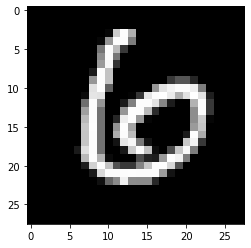

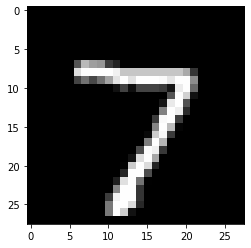

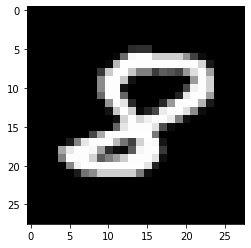

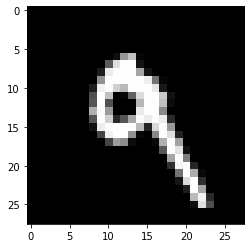

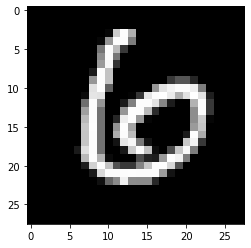

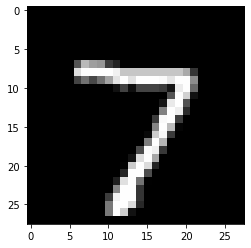

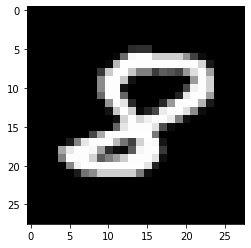

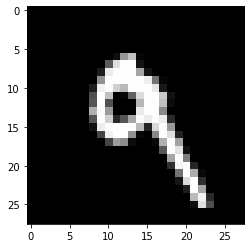

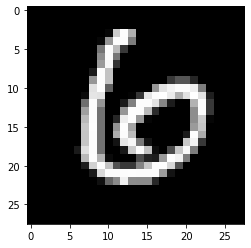

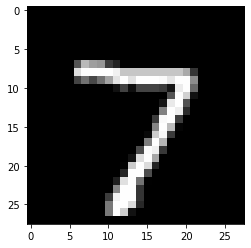

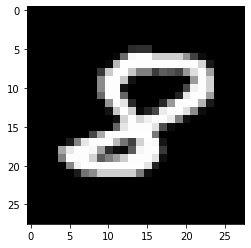

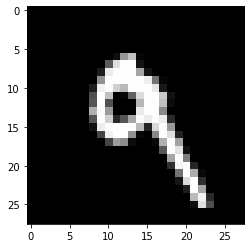

In [338]:
for trial in range(400):
    s= X_train[0] #np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    for t in range(0,10):
        prediction=mnist_model.predict(s.reshape(1,784), steps=1, verbose=0)
        layer_output = get_4th_layer_output(s.reshape(1,784))[0]
        indices = [layer_output.argmax()]
        depth = 10
        state = tensorflow.one_hot(indices, depth).numpy()
        if terminal_state(state.reshape(10,)): break
        if trial > 30 and invT > 0.1: invT -= 0.001
        aidx=np.argmax(prediction)
        if np.random.rand() < invT : aidx=1-aidx
        a=2*aidx-1
        next_s = tau(state.reshape(10,),a)
        if terminal_state(next_s): 
            y = rho(next_s)
            next_s = getNextStateImage(next_s)
        else:
            next_s = getNextStateImage(next_s)
            y = gamma*np.max(mnist_model.predict(next_s.reshape(1,784), steps=1, verbose=0))
        prediction[0,aidx]=y
        mnist_model.fit(s.reshape(1,784), prediction, epochs=1, verbose=0)
        s = np.copy(next_s)

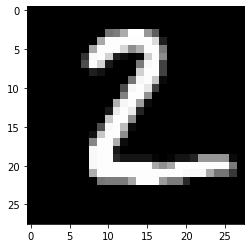

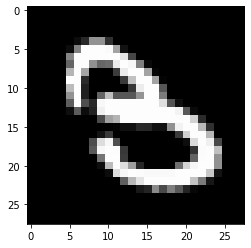

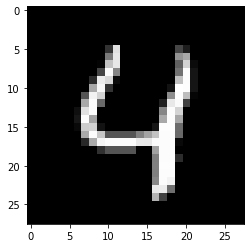

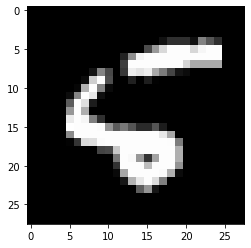

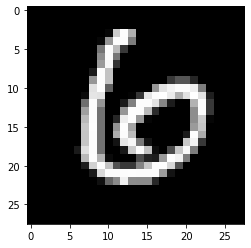

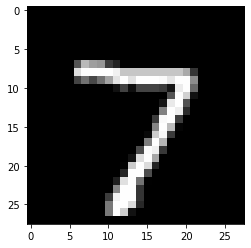

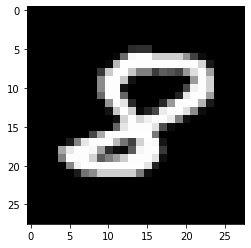

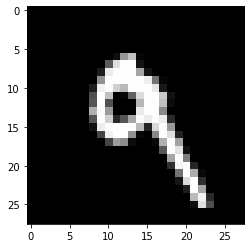

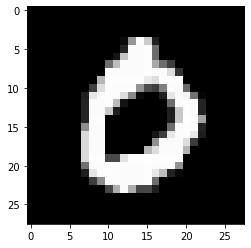

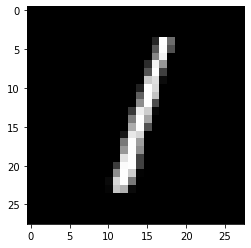

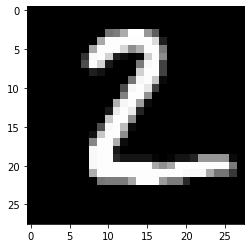

[[[1.3312688  0.6488794  0.5632529  0.7569503  0.93522227 1.0209354
   1.4880167  0.9123738  1.0348169  0.68552864]]

 [[1.0306224  0.7692889  0.7685406  1.0230535  1.2403771  1.6148218
   1.9644259  0.78162056 1.3027096  0.7266208 ]]]
policy: [-1.  1.  1.  1.  1.  1.  1. -1.  1.  1.]


In [347]:
policy = np.zeros(10)
Q=[]
s = getNextStateImage(np.array([0,0,1,0,0,0,0,0,0,0]))
for i in range(0,10):
    Qs=mnist_model.predict(s.reshape(1,784), steps=1)
    Q.append(Qs)
    aidx=np.argmax(Qs)
    policy[i]=2*aidx-1
    layer_output = get_4th_layer_output(s.reshape(1,784))[0]
    indices = [layer_output.argmax()]
    depth = 10
    state = tensorflow.one_hot(indices, depth).numpy()
    state = np.roll(state,1)
    s = getNextStateImage(state)
print(np.transpose(Q))
print('policy:',np.transpose(policy))

In [285]:
def getNextStateImage(next_s):
  next_state = next_s.argmax()
  for image in X_test:
    pred = mnist_model.predict(np.array([image.reshape(1,784)]))
    # plt.imshow(image.reshape(28,28), cmap='gray')
    # plt.show()
    if get_4th_layer_output(image.reshape(1,784))[0].argmax() == next_state:
      plt.imshow(image.reshape(28,28), cmap='gray')
      plt.show()
      return image

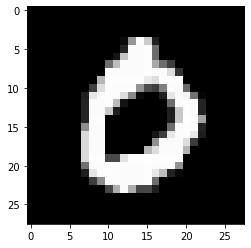

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [286]:
getNextStateImage(np.array([1,0,0,0,0,0,0,0,0,0]))